*Importing packages*

In [ ]:
import yfinance as yahooFinance
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=1b7caab5c17a30791d7a7f834d66ca6c24488967ffe790b91eecd1e02ea6f451
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
from scipy.stats import t
from ta import momentum, trend

Selecting start and end data for the analysis.
Starting from 1 feb 2024 (creation of $VGT), ending today

In [ ]:
start = "2004-02-01"
end = '2024-09-08'

Downloading historical price data from Yahoo Finance

In [ ]:
VGT = yahooFinance.download('VGT', start=start, end=end)['Adj Close']
SPX = yahooFinance.download('^SPX', start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GIven the nominal price is widely different between the 2 titles, Normalization is necessary to plot them together.

The Adj Close takes into account Dividens and stock splits

In [ ]:
VGT_normalized = (VGT / VGT.iloc[0]) * 100
SPX_normalized = (SPX / SPX.iloc[0]) * 100

<ipython-input-18-27da75b17753>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(VGT_normalized.index[-1], VGT_normalized[-1], f'{VGT_normalized[-1]:.0f}', color='blue', ha='left', va='center')
<ipython-input-18-27da75b17753>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(SPX_normalized.index[-1], SPX_normalized[-1], f'{SPX_normalized[-1]:.0f}', color='orange', ha='left', va='center')
<ipython-input-18-27da75b17753>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). 

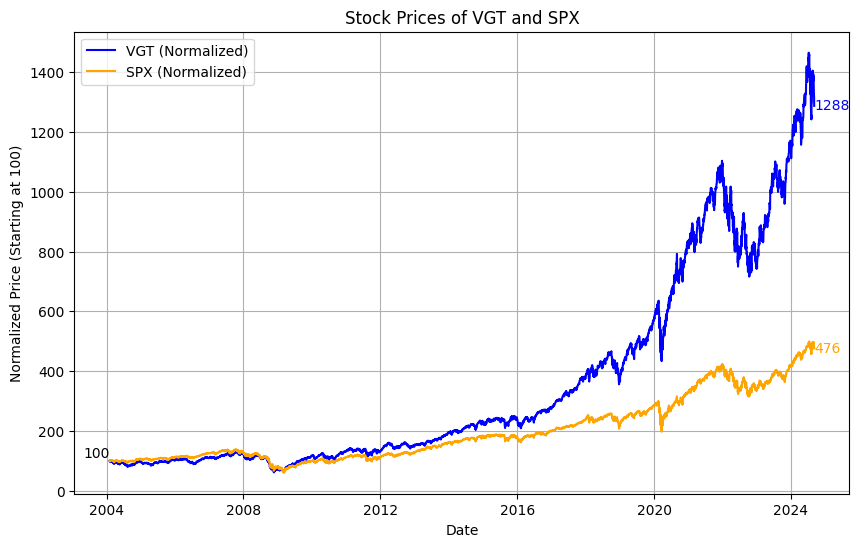

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(VGT_normalized, label='VGT (Normalized)', color='blue')
plt.plot(SPX_normalized, label='SPX (Normalized)', color='orange')

plt.text(VGT_normalized.index[-1], VGT_normalized[-1], f'{VGT_normalized[-1]:.0f}', color='blue', ha='left', va='center')
plt.text(SPX_normalized.index[-1], SPX_normalized[-1], f'{SPX_normalized[-1]:.0f}', color='orange', ha='left', va='center')

plt.text(VGT_normalized.index[0], VGT_normalized[0], f'{VGT_normalized[0]:.0f}', color='black', ha='right', va='bottom')
#plt.text(SPX_normalized.index[0], SPX_normalized[0], f'{SPX_normalized[0]:.0f}', color='orange', ha='left', va='top')

plt.title('Stock Prices of VGT and SPX')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Starting at 100)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
total_return_VGT = ((VGT[-1] - VGT[0]) / VGT[0]) * 100
total_return_SPX = ((SPX[-1] - SPX[0]) / SPX[0]) * 100

<ipython-input-10-7014c95c3fff>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return_VGT = ((VGT[-1] - VGT[0]) / VGT[0]) * 100
<ipython-input-10-7014c95c3fff>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return_SPX = ((SPX[-1] - SPX[0]) / SPX[0]) * 100


In [ ]:

print(f"Total Return for VGT: {total_return_VGT:.2f}%")
print(f"Total Return for SPX: {total_return_SPX:.2f}%")

Total Return for VGT: 1187.69%
Total Return for SPX: 376.40%


We analyzed price's permoformance for SP500 and Big Tech high quality stocks.
The price chart takes into account Dividends and stock splits.
Prices have been normalized in order to compare performance.

In [ ]:
# n years
n_years = (pd.to_datetime(end) - pd.to_datetime(start)).days / 365.25

# CAGR for VGT
VGT_start_price = VGT.iloc[0]
VGT_end_price = VGT.iloc[-1]
VGT_CAGR = (VGT_end_price / VGT_start_price) ** (1 / n_years) - 1

# CAGR for SPX
SPX_start_price = SPX.iloc[0]
SPX_end_price = SPX.iloc[-1]
SPX_CAGR = (SPX_end_price / SPX_start_price) ** (1 / n_years) - 1

print(f'CAGR for VGT from {start} to {end}: {VGT_CAGR:.2%}')
print(f'CAGR for SPX from {start} to {end}: {SPX_CAGR:.2%}')

CAGR for VGT from 2004-02-01 to 2024-09-08: 13.21%
CAGR for SPX from 2004-02-01 to 2024-09-08: 7.87%


CAGR for VGT ( the big tech high quality stocks ) has been almsot double the SP500 one

In [ ]:
from scipy import stats

In [ ]:
returns_VGT = VGT.pct_change().dropna()
returns_SPX = SPX.pct_change().dropna()

In [ ]:
def calculate_statistics(data):
    mean = np.mean(data) *100
    sd = np.std(data) *100
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    data_max = np.max(data) *100
    data_min = np.min(data) *100

    return mean, sd, skewness, kurtosis, data_max, data_min

VGT_stats = calculate_statistics(returns_VGT)
SPX_stats = calculate_statistics(returns_SPX)

In [ ]:
print("VGT Statistics (in %):")
print(f"Mean: {VGT_stats[0]:.2f}%")
print(f"Standard Deviation: {VGT_stats[1]:.2f}%")
print(f"Skewness: {VGT_stats[2]:.2f}")
print(f"Excess Kurtosis: {VGT_stats[3]:.2f}")
print(f"Max: {VGT_stats[4]:.2f}%")
print(f"Min: {VGT_stats[5]:.2f}%")

print("\nSPX Statistics (in %):")
print(f"Mean: {SPX_stats[0]:.2f}%")
print(f"Standard Deviation: {SPX_stats[1]:.2f}%")
print(f"Skewness: {SPX_stats[2]:.2f}")
print(f"Excess Kurtosis: {SPX_stats[3]:.2f}")
print(f"Max: {SPX_stats[4]:.2f}%")
print(f"Min: {SPX_stats[5]:.2f}%")

VGT Statistics (in %):
Mean: 0.06%
Standard Deviation: 1.41%
Skewness: -0.14
Excess Kurtosis: 7.10
Max: 11.01%
Min: -13.49%

SPX Statistics (in %):
Mean: 0.04%
Standard Deviation: 1.20%
Skewness: -0.26
Excess Kurtosis: 12.94
Max: 11.58%
Min: -11.98%


1. Mean Returns:
VGT (0.06%) has a slightly higher mean daily return compared to the S&P 500 (0.04%).
This suggests that over the time period you're analyzing, the VGT has on average provided slightly better daily returns compared to the broader market.
2. Volatility (Standard Deviation):
VGT's standard deviation (1.41%) is higher than SPX's (1.20%).
VGT is more volatile than the S&P 500, meaning its returns fluctuate more from day to day. This is typical for a technology-focused fund, as the tech sector is known for higher volatility compared to the more diversified S&P 500.
3. Skewness:
Both distributions show negative skewness:
VGT (-0.14): Slightly negative skew indicates a small probability of extreme negative returns, but it is closer to zero, indicating a more balanced distribution of returns compared to SPX.
SPX (-0.26): The S&P 500 has a more pronounced negative skew, suggesting that it experienced more frequent extreme negative returns than VGT.
In general, negative skewness implies that there are more extreme losses than extreme gains.
4. Excess Kurtosis:
VGT (7.10) and SPX (12.94) both exhibit high kurtosis, with SPX showing much higher kurtosis.
High kurtosis means both distributions have fat tails, indicating a higher likelihood of extreme events (either gains or losses) than a normal distribution would predict.
SPX’s much higher kurtosis (12.94) suggests that the S&P 500 experienced more extreme daily return events compared to VGT. This is a bit surprising, as VGT is often seen as a more volatile index, but it indicates that the broad market had more frequent "shock" events in the dataset you're analyzing.

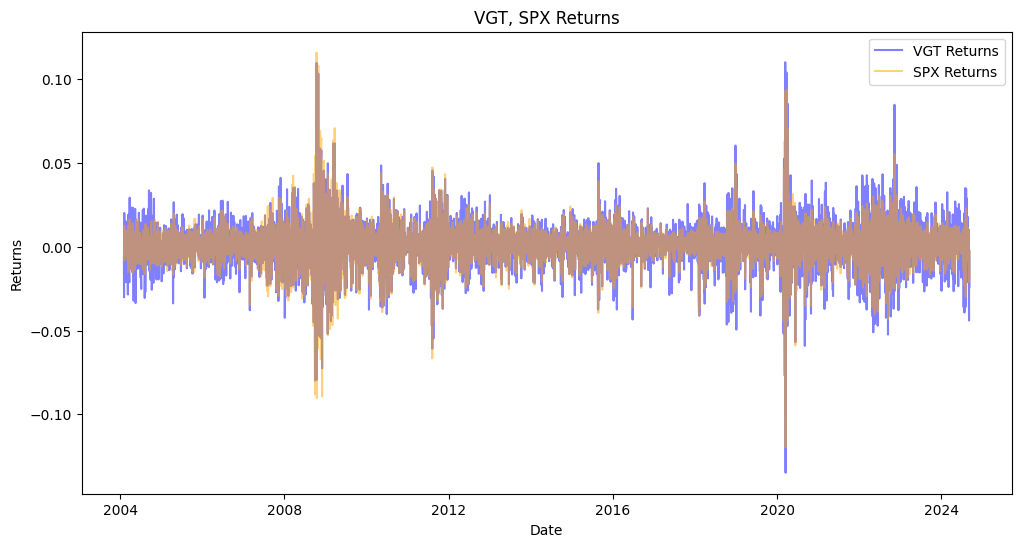

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(returns_VGT, label='VGT Returns',color='blue',alpha=0.5)
plt.plot( returns_SPX, label='SPX Returns',color='orange',alpha=0.5)
plt.title('VGT, SPX Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

VGT and SP500 returns

In [ ]:
# Risk-free rate, source: U.S. 10 Year Treasury, CNBC 21/09/2024
risk_free_rate_today_scenario = 3.741 / 100
#source for fed target: FedWatch - CME Group
risk_free_rate_cut_rate_scenario = 2.75 / 100

In [ ]:
# daily risk-free rate (assuming 252 trading days in a year)
daily_risk_free_rate_today_scenario = (1 + risk_free_rate_today_scenario)**(1/252) - 1
aily_risk_free_rate_cut_rate_scenario = (1 + risk_free_rate_cut_rate_scenario)**(1/252) - 1

def calculate_sharpe_ratio(returns, risk_free_rate):

    mean_return = np.mean(returns)
    std_dev = np.std(returns)
    excess_return = mean_return - risk_free_rate
    sharpe_ratio = excess_return / std_dev
    return sharpe_ratio

sharpe_ratio_VGT_today_scenario = calculate_sharpe_ratio(returns_VGT, daily_risk_free_rate_today_scenario)
sharpe_ratio_VGT_cut_rate_scenario = calculate_sharpe_ratio(returns_VGT, aily_risk_free_rate_cut_rate_scenario)

sharpe_ratio_SPX_today_scenario = calculate_sharpe_ratio(returns_SPX, daily_risk_free_rate_today_scenario)
sharpe_ratio_SPX_cut_rate_scenario = calculate_sharpe_ratio(returns_SPX, aily_risk_free_rate_cut_rate_scenario)

print(f"Sharpe Ratio for VGT in today rates scenario: {sharpe_ratio_VGT_today_scenario:.4f}")
print(f"Sharpe Ratio for SPX in today rates scenario: {sharpe_ratio_SPX_today_scenario:.4f}")


print(f"Sharpe Ratio for VGT in Fed (end 2025) scenario: {sharpe_ratio_VGT_cut_rate_scenario:.4f}")
print(f"Sharpe Ratio for SPX in Fed (end 2025) scenario: {sharpe_ratio_SPX_cut_rate_scenario:.4f}")

Sharpe Ratio for VGT in today rates scenario: 0.0317
Sharpe Ratio for SPX in today rates scenario: 0.0190
Sharpe Ratio for VGT in Fed (end 2025) scenario: 0.0344
Sharpe Ratio for SPX in Fed (end 2025) scenario: 0.0222


1. Today's Interest Rate Scenario:
VGT (Sharpe Ratio: 0.0317) outperforms SPX (Sharpe Ratio: 0.0190) in today’s higher interest rate environment.
VGT's stronger risk-adjusted performance suggests that despite its sector-specific exposure (technology), it has been able to provide better returns relative to the volatility it carries compared to the broad market.
SPX's lower Sharpe ratio reflects weaker risk-adjusted returns, which could be due to broader market volatility, earnings pressure, or sensitivity to macroeconomic factors in the higher rate environment.
The relatively low Sharpe ratios indicate that both funds have faced challenges in delivering strong excess returns over the risk-free rate in a higher-rate scenario, though VGT has performed better.
2. Fed’s Expected 2025 Scenario (lower rates):
Both VGT (Sharpe Ratio: 0.0344) and SPX (Sharpe Ratio: 0.0222) show improvements in their Sharpe ratios under the expected lower interest rate scenario by 2025.
VGT continues to outperform SPX in this scenario, with its Sharpe ratio increasing from 0.0317 to 0.0344, indicating that VGT’s tech exposure remains attractive in a lower-rate environment. The improvement suggests that as borrowing costs decrease and growth sectors like technology benefit, VGT’s risk-adjusted returns become even more favorable.
SPX’s Sharpe ratio also improves from 0.0190 to 0.0222, but the improvement is not as significant as VGT’s. This indicates that while a broad-market index like SPX benefits from lower rates, its risk-adjusted performance still lags behind VGT.

In [ ]:
def print_return_stats(returns, name):

    mean_return = returns.mean() *100
    positive_returns = returns[returns > 0]
    negative_returns = returns[returns < 0]

    mean_positive_return = positive_returns.mean() *100
    max_return = returns.max()*100
    mean_negative_return = negative_returns.mean() *100
    min_return = returns.min() *100

    print(f"Return Statistics for {name}:")
    print(f"Mean Return: {mean_return:.2f}%")
    print(f"Mean Positive Return: {mean_positive_return:.2f}%")
    print(f"Max Return: {max_return:.2f}%")
    print(f"Mean Negative Return: {mean_negative_return:.2f}%")
    print(f"Min Return: {min_return:.2f}%\n")

In [ ]:
print_return_stats(returns_VGT, "VGT")
print_return_stats(returns_SPX, "SPX")

Return Statistics for VGT:
Mean Return: 0.06%
Mean Positive Return: 0.94%
Max Return: 11.01%
Mean Negative Return: -1.05%
Min Return: -13.49%

Return Statistics for SPX:
Mean Return: 0.04%
Mean Positive Return: 0.74%
Max Return: 11.58%
Mean Negative Return: -0.80%
Min Return: -11.98%



Mean Return: Both VGT (0.06%) and SPX (0.04%) have relatively low mean returns, with VGT slightly outperforming SPX.

Mean Positive Return: VGT shows a higher mean positive return (0.94%) compared to SPX (0.74%), indicating that VGT tends to perform better on days with positive returns.

Max Return: SPX has a slightly higher maximum return (11.58%) than VGT (11.01%), suggesting SPX experienced a stronger positive outlier at its peak.
Mean Negative Return: VGT has a more negative mean return on its down days (-1.05%) compared to SPX (-0.80%), implying that VGT tends to fall more sharply when its returns are negative.

Min Return: VGT also shows a larger negative outlier, with a minimum return of -13.49% versus SPX’s -11.98%, highlighting greater downside risk for VGT.


In [ ]:
volatility_VGT = returns_VGT.rolling(window=30).std() * np.sqrt(252)
volatility_SPX = returns_SPX.rolling(window=30).std() * np.sqrt(252)

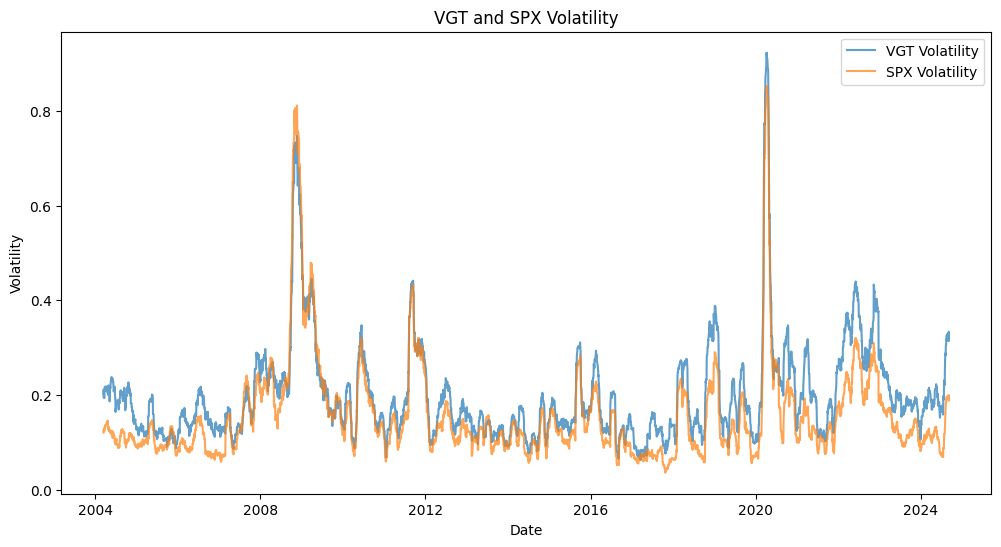

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(volatility_VGT.index, volatility_VGT, label='VGT Volatility',alpha=0.7)
plt.plot(volatility_SPX.index, volatility_SPX, label='SPX Volatility',alpha=0.7)
plt.title('VGT and SPX Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

scrivi in descrizione immagine:  30-Day Rolling

In [ ]:
def rolling_volatility(returns, window, upside=True):
    if upside:
        # Focus positive ret
        target_returns = returns[returns > 0]
    else:
        # Focus neg ret
        target_returns = returns[returns < 0]

    rolling_vol = target_returns.rolling(window=window).std() * np.sqrt(252)  # Annualized
    return rolling_vol

In [ ]:
window_size = 30
VGT_rolling_upside_volatility = rolling_volatility(returns_VGT, window_size, upside=True)
VGT_rolling_downside_volatility = rolling_volatility(returns_VGT, window_size, upside=False)

SPX_rolling_upside_volatility = rolling_volatility(returns_SPX, window_size, upside=True)
SPX_rolling_downside_volatility = rolling_volatility(returns_SPX, window_size, upside=False)

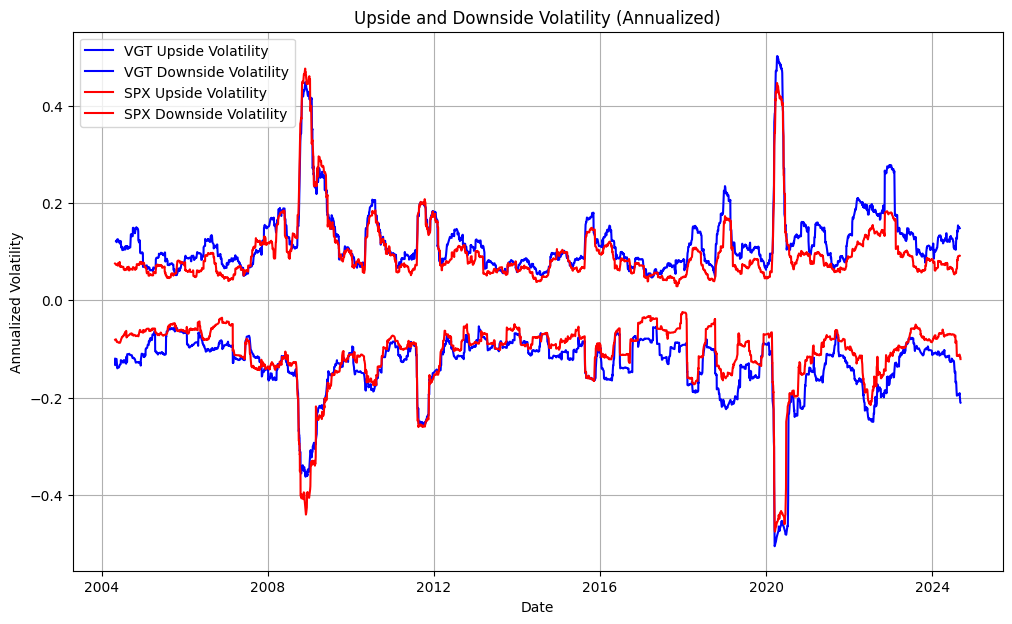

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(VGT_rolling_upside_volatility, label='VGT Upside Volatility', color='blue')
plt.plot(-VGT_rolling_downside_volatility, label='VGT Downside Volatility', color='blue')

plt.plot(SPX_rolling_upside_volatility, label='SPX Upside Volatility', color='red')
plt.plot(-SPX_rolling_downside_volatility, label='SPX Downside Volatility', color='red')

plt.title('Upside and Downside Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Numerical Summary for VGT Rolling Volatilities:")
print(f"VGT Upside Volatility - Mean: {VGT_rolling_upside_volatility.mean():.4f}, Max: {VGT_rolling_upside_volatility.max():.4f}, Min: {VGT_rolling_upside_volatility.min():.4f}")
print(f"VGT Downside Volatility - Mean: {VGT_rolling_downside_volatility.mean():.4f}, Max: {VGT_rolling_downside_volatility.max():.4f}, Min: {VGT_rolling_downside_volatility.min():.4f}\n")

print("Numerical Summary for SPX Rolling Volatilities:")
print(f"SPX Upside Volatility - Mean: {SPX_rolling_upside_volatility.mean():.4f}, Max: {SPX_rolling_upside_volatility.max():.4f}, Min: {SPX_rolling_upside_volatility.min():.4f}")
print(f"SPX Downside Volatility - Mean: {SPX_rolling_downside_volatility.mean():.4f}, Max: {SPX_rolling_downside_volatility.max():.4f}, Min: {SPX_rolling_downside_volatility.min():.4f}\n")



Numerical Summary for VGT Rolling Volatilities:
VGT Upside Volatility - Mean: 0.1208, Max: 0.5013, Min: 0.0462
VGT Downside Volatility - Mean: 0.1368, Max: 0.5052, Min: 0.0535

Numerical Summary for SPX Rolling Volatilities:
SPX Upside Volatility - Mean: 0.0978, Max: 0.4759, Min: 0.0288
SPX Downside Volatility - Mean: 0.1134, Max: 0.4752, Min: 0.0240



VGT Upside vs. Downside Volatility: VGT shows slightly higher downside volatility (mean of 0.1368) compared to its upside volatility (mean of 0.1208). This suggests that VGT tends to experience larger price fluctuations when moving downwards, indicating higher risk during negative market movements.

SPX Upside vs. Downside Volatility: Similarly, SPX also has higher downside volatility (mean of 0.1134) compared to upside volatility (mean of 0.0978), but both figures are lower than VGT’s, implying that SPX is less volatile overall in both directions.

Maximum Volatility: Both VGT and SPX show comparable maximum volatilities, but VGT consistently has higher minimum volatilities, meaning it generally experiences more frequent and larger price swings compared to SPX.

In [ ]:
def calculate_drawdown(price_series):
    running_max = price_series.cummax()
    drawdown = (price_series - running_max) / running_max
    return drawdown

In [ ]:
VGT_drawdown = calculate_drawdown(VGT)
SPX_drawdown = calculate_drawdown(SPX)

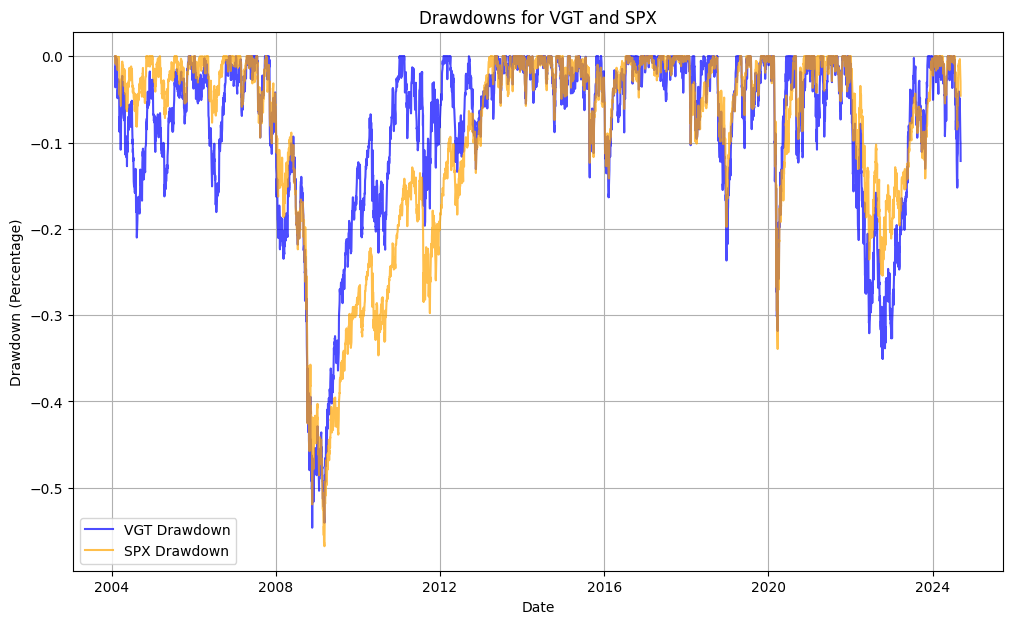

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(VGT_drawdown, label='VGT Drawdown', color='blue',alpha=0.7)
plt.plot(SPX_drawdown, label='SPX Drawdown', color='orange',alpha=0.7)
plt.title('Drawdowns for VGT and SPX')
plt.xlabel('Date')
plt.ylabel('Drawdown (Percentage)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Drawdown Summary for VGT:")
print(f"Worst Drawdown for VGT: {VGT_drawdown.min():.2%}")
print(f"Mean Drawdown for VGT: {VGT_drawdown.mean():.2%}\n")

print("Drawdown Summary for SPX:")
print(f"Worst Drawdown for SPX: {SPX_drawdown.min():.2%}")
print(f"Mean Drawdown for SPX: {SPX_drawdown.mean():.2%}\n")

Drawdown Summary for VGT:
Worst Drawdown for VGT: -54.63%
Mean Drawdown for VGT: -8.21%

Drawdown Summary for SPX:
Worst Drawdown for SPX: -56.78%
Mean Drawdown for SPX: -8.76%



Worst Drawdown: Both VGT (-54.63%) and SPX (-56.78%) have experienced significant historical losses, with SPX having a slightly worse maximum drawdown, indicating a deeper historical decline during market downturns.

Mean Drawdown: The mean drawdown for SPX (-8.76%) is marginally higher than VGT's (-8.21%), suggesting that, on average, SPX experiences slightly deeper declines compared to VGT.

In [ ]:
positive_returns_VGT = returns_VGT[returns_VGT > 0]
negative_returns_VGT = returns_VGT[returns_VGT < 0]
positive_returns_SPX = returns_SPX[returns_SPX > 0]
negative_returns_SPX = returns_SPX[returns_SPX < 0]

mu1 = returns_VGT.mean()
sigma1 = returns_VGT.std()
simulated_returns1 = np.random.normal(mu1, sigma1, len(VGT))

mu2 = returns_SPX.mean()
sigma2 = returns_SPX.std()
simulated_returns2 = np.random.normal(mu2, sigma2, len(SPX))

In [ ]:
std_dev1_VGT = returns_VGT.std()
std_dev2_VGT = 2 * std_dev1_VGT
std_dev1_SPX = returns_SPX.std()
std_dev2_SPX = 2 * std_dev1_SPX


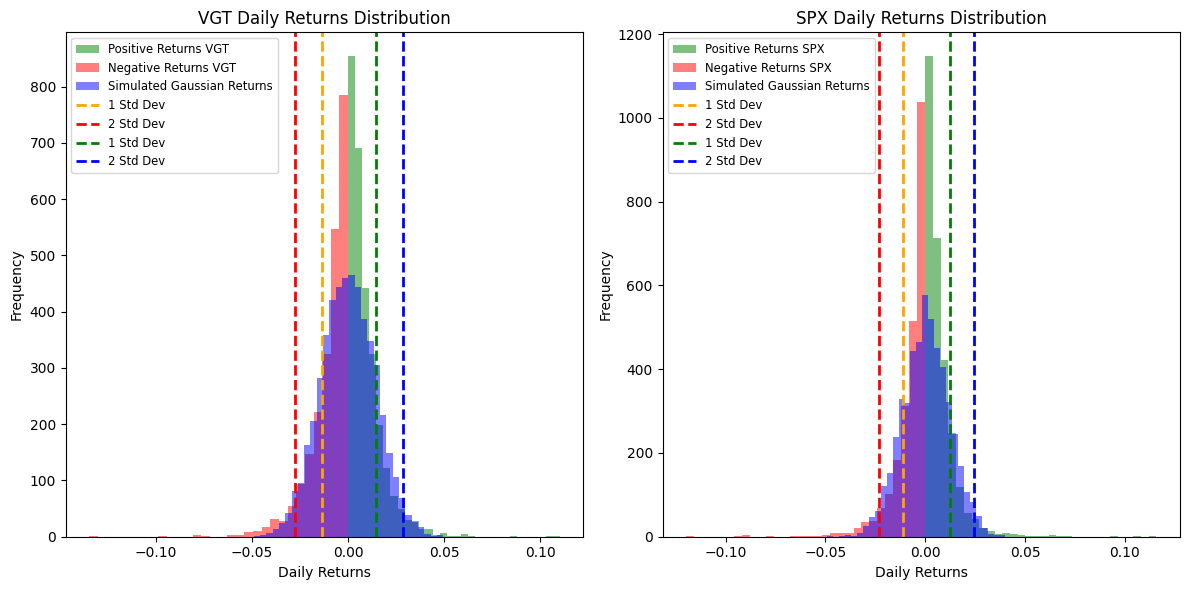

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(positive_returns_VGT, bins=30, alpha=0.5, color='green', label='Positive Returns VGT')
axes[0].hist(negative_returns_VGT, bins=30, alpha=0.5, color='red', label='Negative Returns VGT')
axes[0].hist(simulated_returns1, bins=30, alpha=0.5, color='blue', label='Simulated Gaussian Returns')

axes[0].axvline(mu1 - std_dev1_VGT, color='orange', linestyle='dashed', linewidth=2, label='1 Std Dev')
axes[0].axvline(mu1 - std_dev2_VGT, color='red', linestyle='dashed', linewidth=2, label='2 Std Dev')
axes[0].axvline(mu1 + std_dev1_VGT, color='green', linestyle='dashed', linewidth=2, label='1 Std Dev')
axes[0].axvline(mu1 + std_dev2_VGT, color='blue', linestyle='dashed', linewidth=2, label='2 Std Dev')

axes[0].set_title('VGT Daily Returns Distribution')
axes[0].set_xlabel('Daily Returns')
axes[0].set_ylabel('Frequency')
axes[0].legend(fontsize='small')

axes[1].hist(positive_returns_SPX, bins=30, alpha=0.5, color='green', label='Positive Returns SPX')
axes[1].hist(negative_returns_SPX, bins=30, alpha=0.5, color='red', label='Negative Returns SPX')
axes[1].hist(simulated_returns2, bins=30, alpha=0.5, color='blue', label='Simulated Gaussian Returns')

axes[1].axvline(mu1 - std_dev1_SPX, color='orange', linestyle='dashed', linewidth=2, label='1 Std Dev')
axes[1].axvline(mu1 - std_dev2_SPX, color='red', linestyle='dashed', linewidth=2, label='2 Std Dev')
axes[1].axvline(mu1 + std_dev1_SPX, color='green', linestyle='dashed', linewidth=2, label='1 Std Dev')
axes[1].axvline(mu1 + std_dev2_SPX, color='blue', linestyle='dashed', linewidth=2, label='2 Std Dev')
axes[1].set_title('SPX Daily Returns Distribution')
axes[1].set_xlabel('Daily Returns')
axes[1].set_ylabel('Frequency')
axes[1].legend(fontsize='small')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
from scipy.stats import norm, t, gennorm
import statsmodels.api as sm

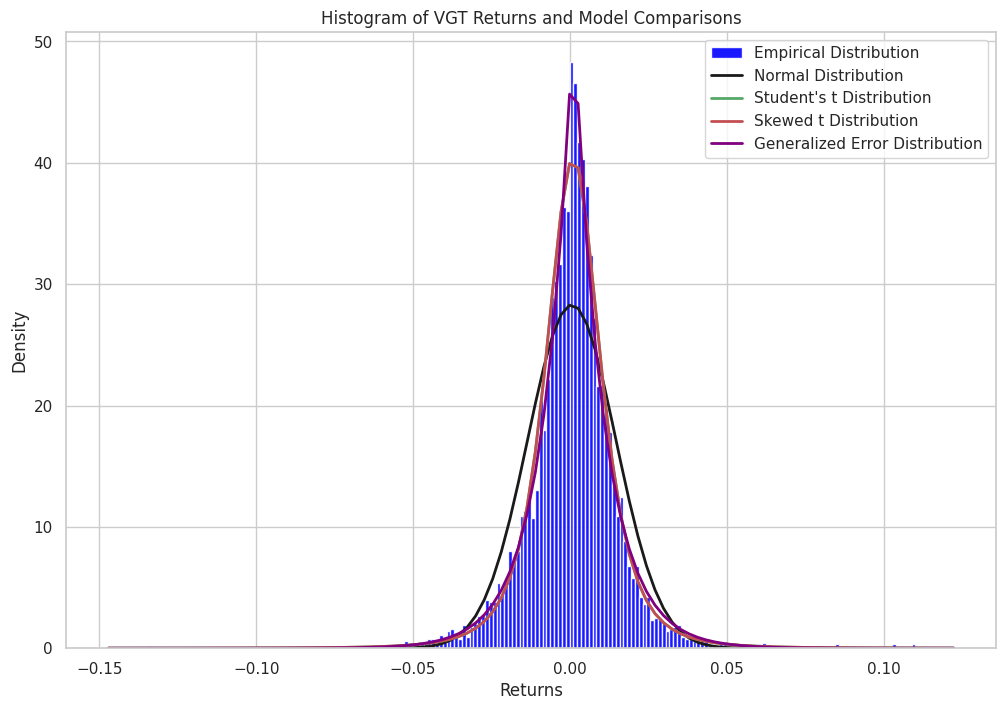

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))


plt.hist(returns_VGT, bins=200, density=True, alpha=0.9, color='blue', label='Empirical Distribution')

# norm
mu, std = norm.fit(returns_VGT)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

#  t
params_t = t.fit(returns_VGT)
p_t = t.pdf(x, *params_t)
plt.plot(x, p_t, 'g', linewidth=2, label='Student\'s t Distribution')

# skewt
params_skewt = sm.OLS(returns_VGT, sm.add_constant(np.arange(len(returns_VGT)))).fit().params
p_skewt = t.pdf(x, *params_t)
plt.plot(x, p_skewt, 'r', linewidth=2, label='Skewed t Distribution')

# ged
params_ged = gennorm.fit(returns_VGT)
p_ged = gennorm.pdf(x, *params_ged)
plt.plot(x, p_ged, 'purple', linewidth=2, label='Generalized Error Distribution')

plt.title('Histogram of VGT Returns and Model Comparisons')

plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

As we can see GED distribution tend to follow better the empirical distribution

In [ ]:
from scipy.stats import kurtosis, skew

In [ ]:
kurtosis_VGT = kurtosis(returns_VGT, fisher=False)  # fisher=False restituisce la kurtosi di Pearson (3  normale)
kurtosis_SPX = kurtosis(returns_SPX, fisher=False)

skewness_VGT = skew(returns_VGT)
skewness_SPX = skew(returns_SPX)

print(f"Kurtosis for VGT: {kurtosis_VGT:.2f}")
print(f"Kurtosis for SPX: {kurtosis_SPX:.2f}")

if kurtosis_VGT > 3:
    print("VGT likely has heavy tails.")
else:
    print("VGT does not have heavy tails.")

if kurtosis_SPX > 3:
    print("SPX likely has heavy tails.")
else:
    print("SPX does not have heavy tails.")

#asimmetry
print(f"Skewness for VGT: {skewness_VGT:.2f}")
if skewness_VGT > 0:
    print("VGT has positive skewness (right tail is longer).")
elif skewness_VGT < 0:
    print("VGT has negative skewness (left tail is longer).")
else:
    print("VGT is symmetrically distributed.")

print(f"Skewness for SPX: {skewness_SPX:.2f}")
if skewness_SPX > 0:
    print("SPX has positive skewness (right tail is longer).")
elif skewness_SPX < 0:
    print("SPX has negative skewness (left tail is longer).")
else:
    print("SPX is symmetrically distributed.")

Kurtosis for VGT: 10.10
Kurtosis for SPX: 15.94
VGT likely has heavy tails.
SPX likely has heavy tails.
Skewness for VGT: -0.14
VGT has negative skewness (left tail is longer).
Skewness for SPX: -0.26
SPX has negative skewness (left tail is longer).


In [ ]:
import scipy.stats as stats

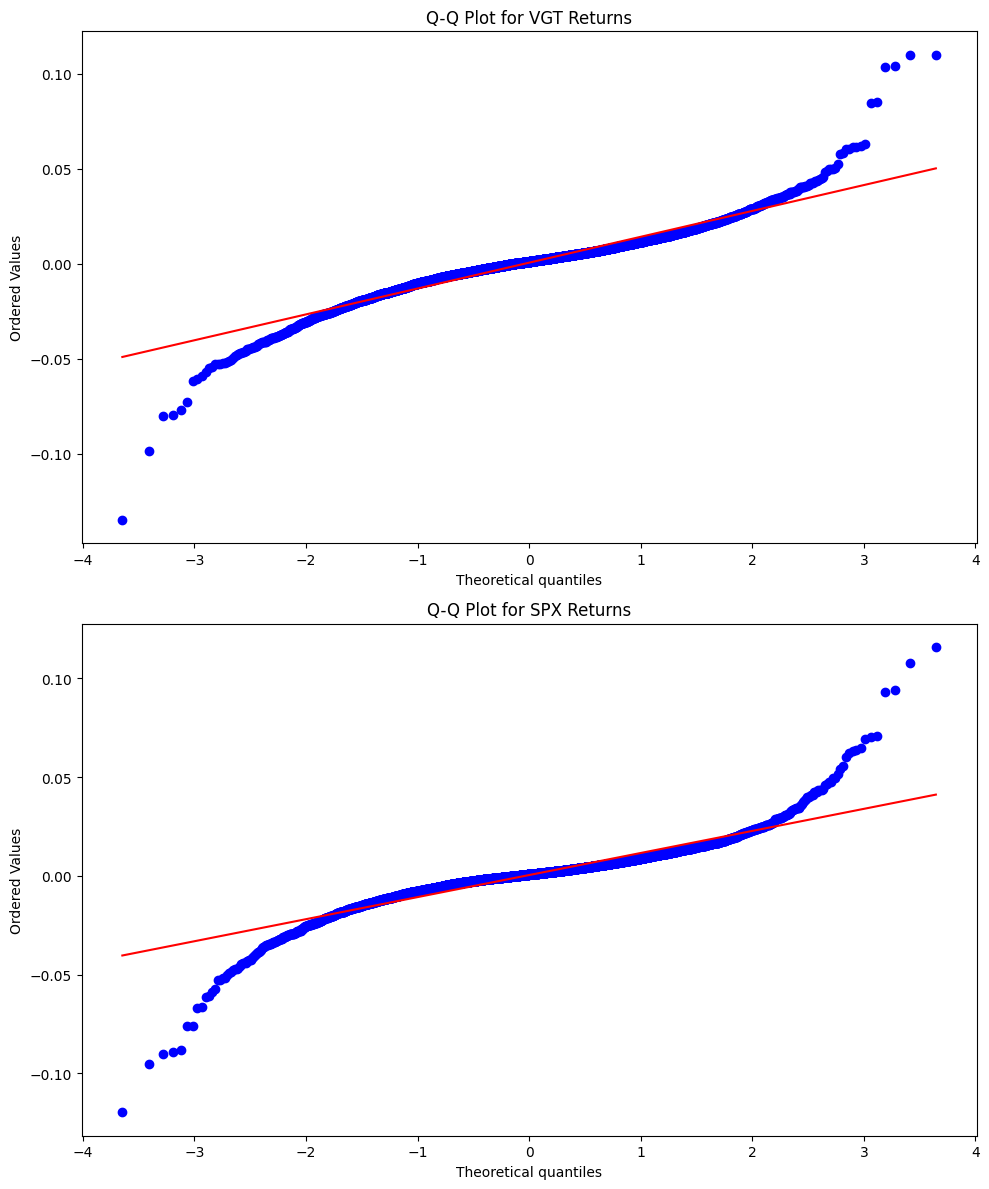

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Q-Q plot for VGT
stats.probplot(returns_VGT, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot for VGT Returns')

# Q-Q plot for SPX
stats.probplot(returns_SPX, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for SPX Returns')
t
plt.tight_layout()
plt.show()

We can notice what shown by the tests, heavy tails and asymmetric (left) distribution, non normality of returns.

In [ ]:
from scipy.stats import jarque_bera


In [ ]:
jb_stat_VGT, jb_pvalue_VGT = jarque_bera(returns_VGT)
jb_stat_SPX, jb_pvalue_SPX = jarque_bera(returns_SPX)

print(f"Jarque-Bera test for VGT: Statistic={jb_stat_VGT:.2f}, p-value={jb_pvalue_VGT:.4f}")
print(f"Jarque-Bera test for SPX: Statistic={jb_stat_SPX:.2f}, p-value={jb_pvalue_SPX:.4f}")

if jb_pvalue_VGT < 0.05:
    print("VGT does not follow a normal distribution, indicating potential heavy tails.")
else:
    print("VGT likely follows a normal distribution.")

if jb_pvalue_SPX < 0.05:
    print("SPX does not follow a normal distribution, indicating potential heavy tails.")
else:
    print("SPX likely follows a normal distribution.")

Jarque-Bera test for VGT: Statistic=10896.43, p-value=0.0000
Jarque-Bera test for SPX: Statistic=36237.44, p-value=0.0000
VGT does not follow a normal distribution, indicating potential heavy tails.
SPX does not follow a normal distribution, indicating potential heavy tails.


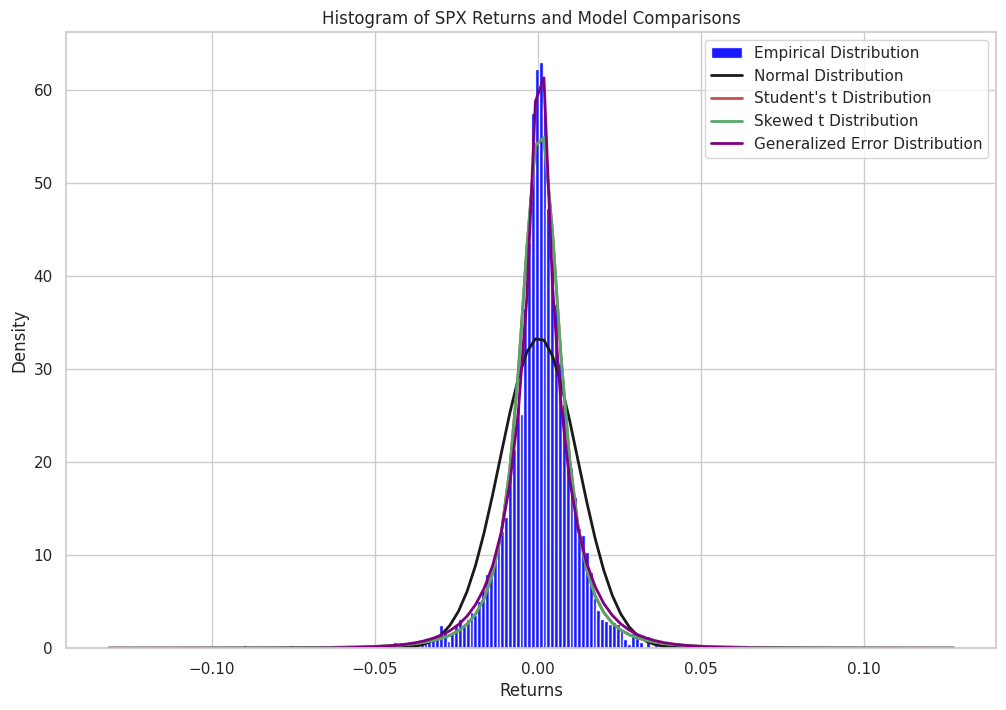

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))


plt.hist(returns_SPX, bins=200, density=True, alpha=0.9, color='blue', label='Empirical Distribution')

# norm
mu, std = norm.fit(returns_SPX)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

#  t
params_t = t.fit(returns_SPX)
p_t = t.pdf(x, *params_t)
plt.plot(x, p_t, 'r', linewidth=2, label='Student\'s t Distribution')

# skewt
params_skewt = sm.OLS(returns_SPX, sm.add_constant(np.arange(len(returns_SPX)))).fit().params
p_skewt = t.pdf(x, *params_t)
plt.plot(x, p_skewt, 'g', linewidth=2, label='Skewed t Distribution')

# ged
params_ged = gennorm.fit(returns_SPX)
p_ged = gennorm.pdf(x, *params_ged)
plt.plot(x, p_ged, 'purple', linewidth=2, label='Generalized Error Distribution')

plt.title('Histogram of SPX Returns and Model Comparisons')

plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

For SPX as for VGT GED distribution follow the empricial better

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result_VGT = adfuller(returns_VGT)
print("ADF Statistic for VGT:", adf_result_VGT[0])
print("p-value for VGT:", adf_result_VGT[1])

adf_result_SPX = adfuller(returns_SPX)
print("ADF Statistic for SPX:", adf_result_SPX[0])
print("p-value for SPX:", adf_result_SPX[1])

ADF Statistic for VGT: -17.95420036963979
p-value for VGT: 2.8316608198606588e-30
ADF Statistic for SPX: -17.921432676957224
p-value for SPX: 2.9051932720757397e-30


The Augmented Dickey-Fuller (ADF) test is used to test for stationarity in a time series.

A p-value close to zero (much less than a common significance level of 0.05) indicates strong evidence against the null hypothesis. Both series have extremely low p-values, suggesting that we can reject the null hypothesis and conclude that both VGT and SPX are stationary

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
lb_test_VGT = acorr_ljungbox(returns_VGT, lags=[10], return_df=True)
print("Ljung-Box Test for VGT:")
print(lb_test_VGT)

lb_test_SPX = acorr_ljungbox(returns_SPX, lags=[10], return_df=True)
print("\nLjung-Box Test for SPX:")
print(lb_test_SPX)

Ljung-Box Test for VGT:
      lb_stat     lb_pvalue
10  101.13675  3.226718e-17

Ljung-Box Test for SPX:
       lb_stat     lb_pvalue
10  131.240302  2.608197e-23


The Ljung-Box test is used to determine whether there are significant autocorrelations in a time series at lags up to a specified number (in this case, 10 lags)

Both VGT and SPX exhibit significant autocorrelation in their returns over the tested lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

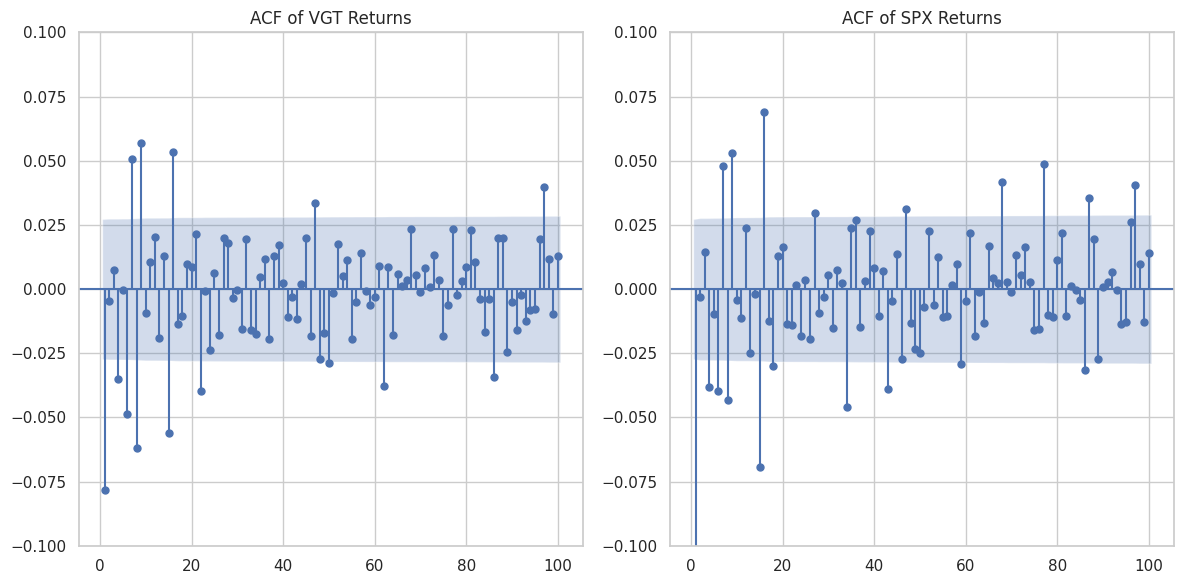

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(returns_VGT, lags=100,zero=False, ax=plt.gca(), title='ACF of VGT Returns')
plt.ylim(-0.1, 0.1)
plt.grid(True)

plt.subplot(1, 2, 2)
plot_acf(returns_SPX, lags=100,zero=False, ax=plt.gca(), title='ACF of SPX Returns')
plt.ylim(-0.1, 0.1)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

In [ ]:
acf_VGT = acf(returns_VGT, nlags=11, fft=False)
acf_SPX = acf(returns_SPX, nlags=11, fft=False)


print("ACF of VGT Returns (first 10 lags):")
for lag, value in enumerate(acf_VGT[1:], start=1):  # Skip lag 0
    print(f"Lag {lag}: {value:.4f}")

print("\nACF of SPX Returns (first 10 lags):")
for lag, value in enumerate(acf_SPX[1:], start=1):  # Skip lag 0
    print(f"Lag {lag}: {value:.4f}")

ACF of VGT Returns (first 10 lags):
Lag 1: -0.0783
Lag 2: -0.0045
Lag 3: 0.0072
Lag 4: -0.0349
Lag 5: -0.0004
Lag 6: -0.0487
Lag 7: 0.0506
Lag 8: -0.0617
Lag 9: 0.0569
Lag 10: -0.0094
Lag 11: 0.0105

ACF of SPX Returns (first 10 lags):
Lag 1: -0.1222
Lag 2: -0.0030
Lag 3: 0.0144
Lag 4: -0.0383
Lag 5: -0.0097
Lag 6: -0.0396
Lag 7: 0.0481
Lag 8: -0.0432
Lag 9: 0.0530
Lag 10: -0.0044
Lag 11: -0.0111


ACF plot for selected returns, 100 lags

ALGORITMO PER IDENTIFICARE IL MIGLIOR ARIMA (p,q range 0-3) modello stazioanrio. metodo best AIC

In [ ]:
import itertools
import statsmodels.api as sm

In [ ]:
p = range(0, 3)
q = range(0, 3)

pq_combinations = list(itertools.product(p, q))

best_aic = float("inf")
best_order = None
best_model = None

In [ ]:
for order in pq_combinations:
    try:
        model = sm.tsa.ARIMA(returns_VGT, order=(order[0], 0, order[1]))
        model_result = model.fit()

        if model_result.aic < best_aic:
            best_aic = model_result.aic
            best_order = order
            best_model = model_result
    except:
        continue  # If the model fails to fit -> skip to the next

print(f"Best ARMA model order: {best_order}")
print(f"Best AIC: {best_aic}")
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Best ARMA model order: (0, 1)
Best AIC: -29502.438557874724
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 5184
Model:                 ARIMA(0, 0, 1)   Log Likelihood               14754.219
Date:                Wed, 09 Oct 2024   AIC                         -29502.439
Time:                        13:10:18   BIC                         -29482.779
Sample:                             0   HQIC                        -29495.561
                               - 5184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      3.234      0.001       0.000       0.001
ma.L1         -0.0792      0.008    -10.004      0.000      -0.095     

modello scelto ARMA(0,1)

In [ ]:
returns_VGT_rescaled = returns_VGT * 100

In [ ]:
model_VGT = sm.tsa.ARIMA(returns_VGT_rescaled, order=(0, 0, 1))
arma_VGT_result = model_VGT.fit()

print("ARMA(1,0) model for VGT returns:")
print(arma_VGT_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1,0) model for VGT returns:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 5184
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -9118.983
Date:                Sat, 12 Oct 2024   AIC                          18243.966
Time:                        10:01:09   BIC                          18263.626
Sample:                             0   HQIC                         18250.844
                               - 5184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0593      0.018      3.235      0.001       0.023       0.095
ma.L1         -0.0794      0.008    -10.026      0.000      -0.095      -0.064
sigma2         1.97

In [ ]:
model_SPX = sm.tsa.ARIMA(returns_SPX, order=(0, 0, 1))
arma_SPX_result = model_SPX.fit()

print("ARMA(0,1) model for SPX returns:")
print(arma_SPX_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(0,1) model for SPX returns:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 5184
Model:                 ARIMA(0, 0, 1)   Log Likelihood               15633.010
Date:                Wed, 09 Oct 2024   AIC                         -31260.020
Time:                        13:10:21   BIC                         -31240.360
Sample:                             0   HQIC                        -31253.142
                               - 5184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.478      0.013    7.76e-05       0.001
ma.L1         -0.1243      0.007    -18.650      0.000      -0.137      -0.111
sigma2         0.00

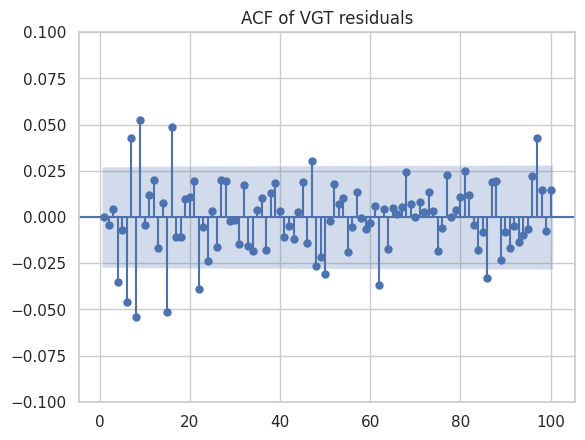

In [ ]:
residuals_VGT = arma_VGT_result.resid
sm.graphics.tsa.plot_acf(residuals_VGT, lags=100,zero=False, ax=plt.gca(),title="ACF of VGT residuals")
plt.ylim(-0.1, 0.1)
plt.show()


In [ ]:
ljung_box_result = acorr_ljungbox(residuals_VGT, lags=[10], return_df=True)
print(ljung_box_result)

    lb_stat     lb_pvalue
10  56.8073  1.448738e-08


p.value < 5%, we cannot exclude autocorrelation

In [ ]:
from statsmodels.stats.diagnostic import het_arch

In [ ]:
arch_test = het_arch(residuals_VGT)
print(f'ARCH Test: p-value={arch_test[1]}')


ARCH Test: p-value=2.456217285493036e-253


The rejection of the null hypothesis indicates that there is significant evidence of conditional heteroskedasticity in the data.

In [ ]:
returns_squared_VGT = returns_VGT ** 2
returns_squared_SPX = returns_SPX** 2

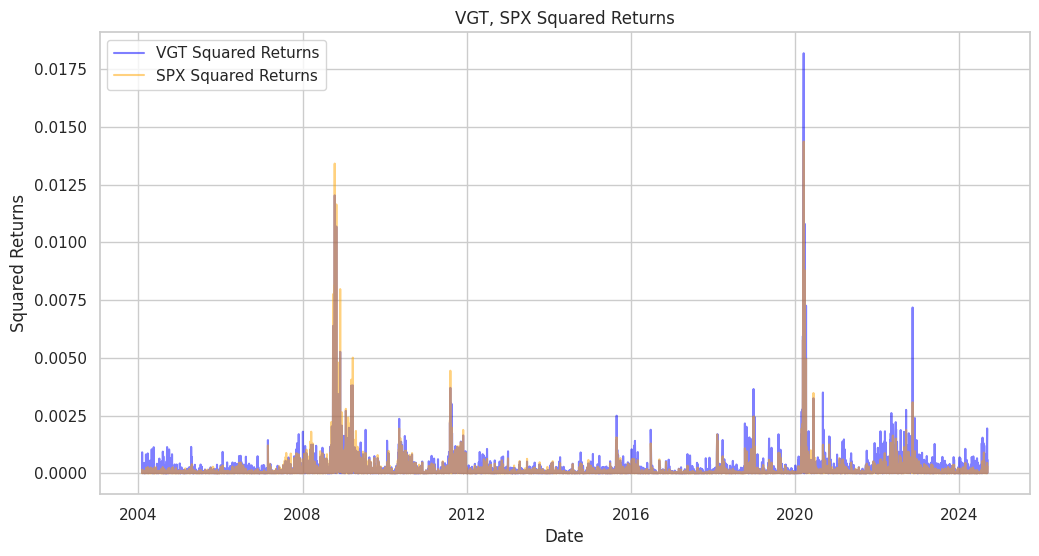

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(returns_squared_VGT, label='VGT Squared Returns',color='blue',alpha=0.5)
plt.plot( returns_squared_SPX, label='SPX Squared Returns',color='orange',alpha=0.5)
plt.title('VGT, SPX Squared Returns')
plt.xlabel('Date')
plt.ylabel('Squared Returns')
plt.legend()
plt.show()

Squared Returns of SPX and VGT financial series, used to catch ARCH behaviours

In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 12.5 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

ALGORITMO PER IDENTIFICARE MIGLIOR ARCH-TYPE E DISTRIBUIONE
(solo 1,1)

In [ ]:
returns_VGT_rescaled = returns_VGT * 100

In [ ]:
garch_types = ['Garch', 'GJR-Garch', 'EGarch', 'Harch', 'APARCH', 'FIGARCH']
distributions = ['normal', 't', 'skewt', 'ged', 'nig']

best_aic = float("inf")
best_garch_type = None
best_distribution = None
best_garch_model = None

In [ ]:
for garch_type in garch_types:
    for dist in distributions:
        try:
            # Create and fit GARCH types and distributions
            model = arch_model(returns_VGT_rescaled, vol=garch_type, p=1, q=1, dist=dist)
            garch_result = model.fit(disp="off")

            # AIC comparison to find best model
            if garch_result.aic < best_aic:
                best_aic = garch_result.aic
                best_garch_type = garch_type
                best_distribution = dist
                best_garch_model = garch_result
        except:
            continue  # If the model fails, skip to the next

print(f"Best GARCH type: {best_garch_type}")
print(f"Best distribution: {best_distribution}")
print(f"Best AIC: {best_aic}")
print(best_garch_model.summary())

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001987. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001987. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarn

Best GARCH type: EGarch
Best distribution: ged
Best AIC: -31445.388184837582
                           Constant Mean - EGARCH Model Results                           
Dep. Variable:                          Adj Close   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 EGARCH   Log-Likelihood:                15727.7
Distribution:      Generalized Error Distribution   AIC:                          -31445.4
Method:                        Maximum Likelihood   BIC:                          -31412.6
                                                    No. Observations:                 5184
Date:                            Wed, Oct 09 2024   Df Residuals:                     5183
Time:                                    13:10:32   Df Model:                            1
                                 Mean Model                                 
                 coef    st

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best GARCH type: EGarch
Best distribution: ged

ALGORITMO PER IDENTIFICARE MIGLIOR ARCH-TYPE E DISTRIBUIONE (combinazioni p,q 1-4)

In [ ]:
p_range = range(1, 4)  # p from 1 to 4
q_range = range(1, 4)  # q from 1 to 4

#comb of p, q
pq_combinations = list(itertools.product(p_range, q_range))

best_aic = float("inf")
best_garch_type = None
best_distribution = None
best_order = None
best_garch_model = None

In [ ]:
for garch_type in garch_types:
    for dist in distributions:
        for pq in pq_combinations:
            try:

                model = arch_model(returns_VGT_rescaled, vol=garch_type, p=pq[0], q=pq[1], dist=dist)
                garch_result = model.fit(disp="off")

                if garch_result.aic < best_aic:
                    best_aic = garch_result.aic
                    best_garch_type = garch_type
                    best_distribution = dist
                    best_order = pq  # Store the best p, q
                    best_garch_model = garch_result
            except:
                continue

print(f"Best GARCH type: {best_garch_type}")
print(f"Best distribution: {best_distribution}")
print(f"Best (p, q): {best_order}")
print(f"Best AIC: {best_aic}")
print(best_garch_model.summary())

Best GARCH type: FIGARCH
Best distribution: skewt
Best (p, q): (1, 1)
Best AIC: 16249.451739580869
                          Constant Mean - FIGARCH Model Results                          
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                               FIGARCH   Log-Likelihood:               -8117.73
Distribution:      Standardized Skew Student's t   AIC:                           16249.5
Method:                       Maximum Likelihood   BIC:                           16295.3
                                                   No. Observations:                 5184
Date:                           Fri, Oct 11 2024   Df Residuals:                     5183
Time:                                   17:40:35   Df Model:                            1
                                Mean Model                                
                

Please note the results may be different, different models have displayed every time, so i will try with: APARCH(1,3) with skewt distr, EGARCH(2,2)-ged and FIGARCH(1,1) WITH SKEW-T

In [ ]:
VGT_model_APARCH = arch_model(returns_VGT_rescaled, vol='APARCH', p=1, q=3, dist='skewt')
VGT_model_APARCH_result = VGT_model_APARCH.fit(disp='off')

In [ ]:
VGT_model_FIGARCH = arch_model(returns_VGT_rescaled, vol='FIGARCH', p=1, q=1, dist='skewt')
VGT_model_FIGARCH_result = VGT_model_FIGARCH.fit(disp='off')

In [ ]:
VGT_model_EGARCH_1 = arch_model(returns_VGT_rescaled, vol='EGARCH', p=1, q=1, dist='ged')
VGT_model_VGT_model_EGARCH_1_result = VGT_model_EGARCH_1.fit(disp='off')

VGT_model_EGARCH_2 = arch_model(returns_VGT_rescaled, vol='EGARCH', p=2, q=2, dist='ged')
VGT_model_VGT_model_EGARCH_2_result = VGT_model_EGARCH_2.fit(disp='off')

                         Constant Mean - Power ARCH Model Results                        
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            Power ARCH   Log-Likelihood:               -8124.01
Distribution:      Standardized Skew Student's t   AIC:                           16266.0
Method:                       Maximum Likelihood   BIC:                           16325.0
                                                   No. Observations:                 5184
Date:                           Fri, Oct 11 2024   Df Residuals:                     5183
Time:                                   17:45:50   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

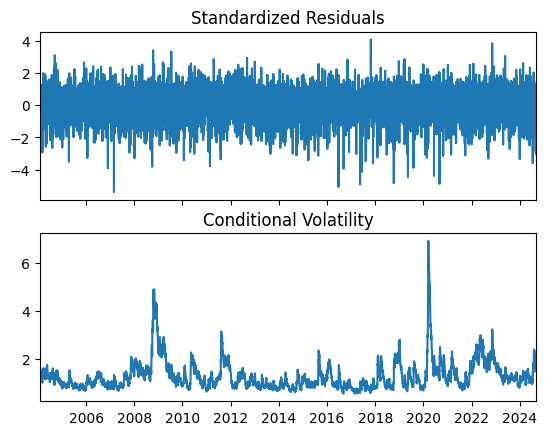

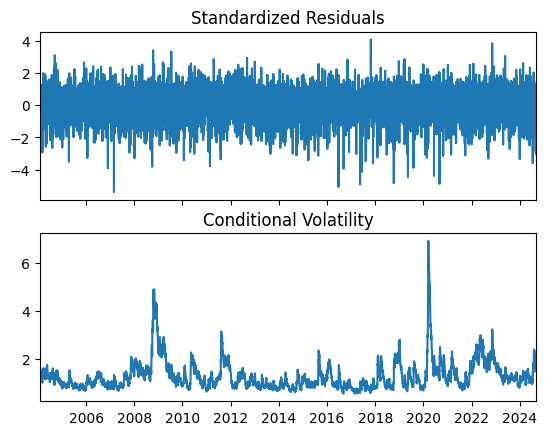

In [ ]:
print(VGT_model_APARCH_result.summary())
VGT_model_APARCH_result.plot()

beta 2 e beta 3 non significativi

In [ ]:
VGT_model_APARCH_1 = arch_model(returns_VGT_rescaled, vol='APARCH', p=1, q=1, dist='skewt')
VGT_model_APARCH_result_1 = VGT_model_APARCH_1.fit(disp='off')

                         Constant Mean - Power ARCH Model Results                        
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            Power ARCH   Log-Likelihood:               -8124.01
Distribution:      Standardized Skew Student's t   AIC:                           16262.0
Method:                       Maximum Likelihood   BIC:                           16307.9
                                                   No. Observations:                 5184
Date:                           Sat, Oct 12 2024   Df Residuals:                     5183
Time:                                   09:51:22   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

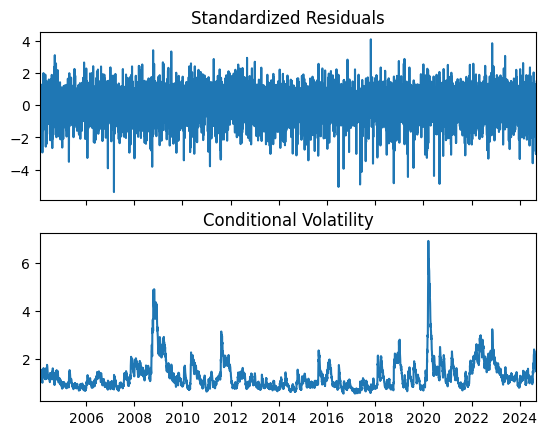

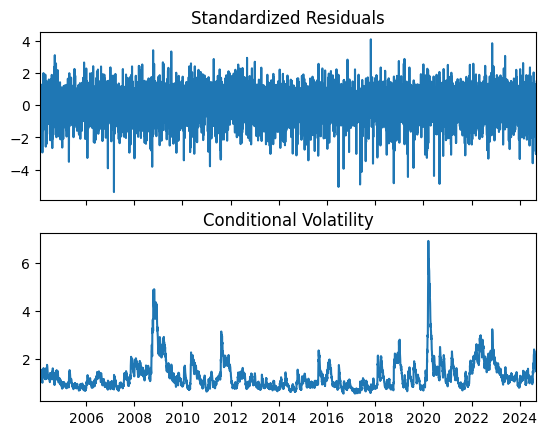

In [ ]:
print(VGT_model_APARCH_result_1.summary())
VGT_model_APARCH_result_1.plot()

                          Constant Mean - FIGARCH Model Results                          
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                               FIGARCH   Log-Likelihood:               -8117.73
Distribution:      Standardized Skew Student's t   AIC:                           16249.5
Method:                       Maximum Likelihood   BIC:                           16295.3
                                                   No. Observations:                 5184
Date:                           Fri, Oct 11 2024   Df Residuals:                     5183
Time:                                   17:45:53   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

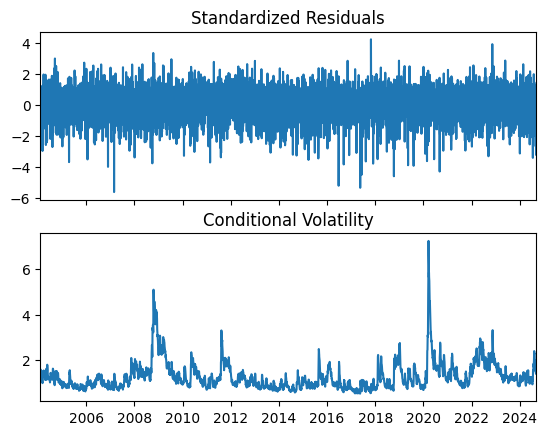

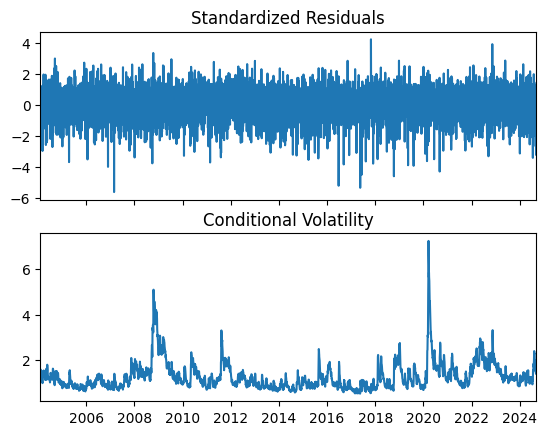

In [ ]:
print(VGT_model_FIGARCH_result.summary())
VGT_model_FIGARCH_result.plot()

                           Constant Mean - EGARCH Model Results                           
Dep. Variable:                          Adj Close   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 EGARCH   Log-Likelihood:               -8145.51
Distribution:      Generalized Error Distribution   AIC:                           16301.0
Method:                        Maximum Likelihood   BIC:                           16333.8
                                                    No. Observations:                 5184
Date:                            Fri, Oct 11 2024   Df Residuals:                     5183
Time:                                    17:47:06   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-------------------------------

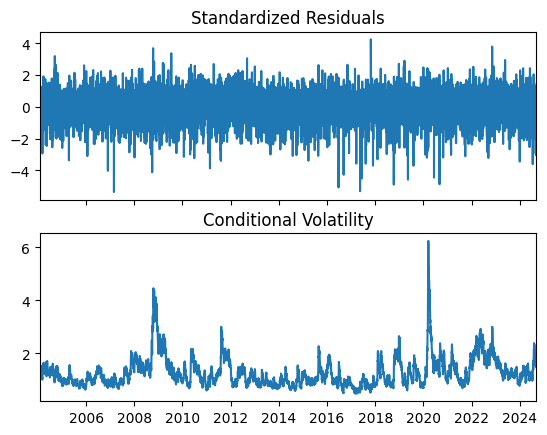

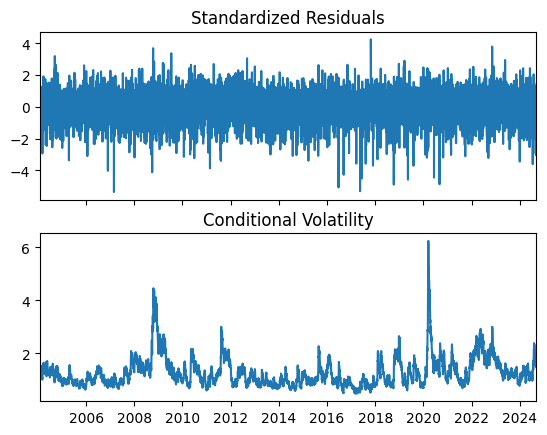

In [ ]:
print(VGT_model_VGT_model_EGARCH_1_result.summary())
VGT_model_VGT_model_EGARCH_1_result.plot()

                           Constant Mean - EGARCH Model Results                           
Dep. Variable:                          Adj Close   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 EGARCH   Log-Likelihood:               -8143.25
Distribution:      Generalized Error Distribution   AIC:                           16300.5
Method:                        Maximum Likelihood   BIC:                           16346.4
                                                    No. Observations:                 5184
Date:                            Fri, Oct 11 2024   Df Residuals:                     5183
Time:                                    17:47:07   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-------------------------------

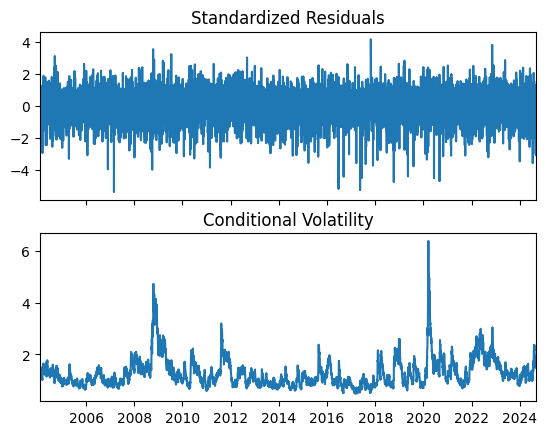

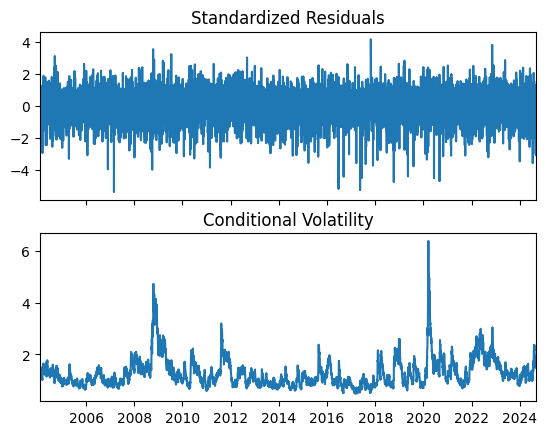

In [ ]:
print(VGT_model_VGT_model_EGARCH_2_result.summary())
VGT_model_VGT_model_EGARCH_2_result.plot()

In [ ]:
aic_APARCH = VGT_model_APARCH_result_1.aic
aic_FIGARCH = VGT_model_FIGARCH_result.aic
aic_EGARCH_1 = VGT_model_VGT_model_EGARCH_1_result.aic
aic_EGARCH_2 = VGT_model_VGT_model_EGARCH_2_result.aic

print("AIC Comparison of VGT Models:")
print(f"Model APARCH(1,1)-skewt AIC: {aic_APARCH:.4f}")
print(f"Model FIGARCH(1,1)-skewt AIC: {aic_FIGARCH:.4f}")
print(f"Model EGARCH(1,1)-ged AIC: {aic_EGARCH_1:.4f}")
print(f"Model EGARCH(2,2)-ged AIC: {aic_EGARCH_2:.4f}")


best_model_aic = min(aic_APARCH, aic_FIGARCH, aic_EGARCH_1, aic_EGARCH_2)
if best_model_aic == aic_APARCH:
    best_model_name = "APARCH(1,1)-skewt"
elif best_model_aic == aic_FIGARCH:
    best_model_name = "FIGARCH(1,1)-skewt"
elif best_model_aic == aic_EGARCH_1:
    best_model_name = "EGARCH(1,1)-ged"
else:
    best_model_name = "EGARCH(2,2)-ged"

print(f"\nBest Model: {best_model_name} with AIC: {best_model_aic:.4f}")


AIC Comparison of VGT Models:
Model APARCH(1,1)-skewt AIC: 16262.0151
Model FIGARCH(1,1)-skewt AIC: 16249.4526
Model EGARCH(1,1)-ged AIC: 16301.0167
Model EGARCH(2,2)-ged AIC: 16300.5093

Best Model: FIGARCH(1,1)-skewt with AIC: 16249.4526


In [ ]:
# Perform the ARCH-LM test for each model
arch_test_APARCH = VGT_model_APARCH_result_1.arch_lm_test()
arch_test_FIGARCH = VGT_model_FIGARCH_result.arch_lm_test()
arch_test_EGARCH_1 = VGT_model_VGT_model_EGARCH_1_result.arch_lm_test()
arch_test_EGARCH_2 = VGT_model_VGT_model_EGARCH_2_result.arch_lm_test()


In [ ]:
print(VGT_model_APARCH_result_1.arch_lm_test())

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 1359.8118
P-value: 0.0000
Distributed: chi2(33)


In [ ]:
pvalue_APARCH = arch_test_APARCH.pval
pvalue_FIGARCH = arch_test_FIGARCH.pval
pvalue_EGARCH_1 = arch_test_EGARCH_1.pval
pvalue_EGARCH_2 = arch_test_EGARCH_2.pval



In [ ]:

# Print the ARCH-LM test results
print("ARCH-LM Test Results for VGT Models:")
print(f"Model APARCH(1,1)-skewt p-value: {arch_test_APARCH.pval:.4f} | Statistic: {arch_test_APARCH.stat:.4f}")
print(f"Model FIGARCH(1,1)-skewt p-value: {arch_test_FIGARCH.pval:.4f} | Statistic: {arch_test_FIGARCH.stat:.4f}")
print(f"Model EGARCH(1,1)-ged p-value: {arch_test_EGARCH_1.pval:.4f} | Statistic: {arch_test_EGARCH_1.stat:.4f}")
print(f"Model EGARCH(2,2)-ged p-value: {arch_test_EGARCH_2.pval:.4f} | Statistic: {arch_test_EGARCH_2.stat:.4f}")

# Optionally, determine the best model based on the p-values
best_arch_test_model = min(
    [(pvalue_APARCH, "APARCH(1,1)"),
     (pvalue_FIGARCH, "FIGARCH(1,1)"),
     (pvalue_EGARCH_1, "EGARCH(1,1)"),
     (pvalue_EGARCH_2, "EGARCH(2,2)")],
    key=lambda x: x[0]
)

print(f"\nModel with lowest p-value in ARCH-LM test: {best_arch_test_model[1]} (p-value: {best_arch_test_model[0]:.4f})")



ARCH-LM Test Results for VGT Models:
Model APARCH(1,1)-skewt p-value: 0.0000 | Statistic: 1359.8118
Model FIGARCH(1,1)-skewt p-value: 0.0000 | Statistic: 1359.5436
Model EGARCH(1,1)-ged p-value: 0.0000 | Statistic: 1361.8736
Model EGARCH(2,2)-ged p-value: 0.0000 | Statistic: 1361.8366

Model with lowest p-value in ARCH-LM test: APARCH(1,1) (p-value: 0.0000)


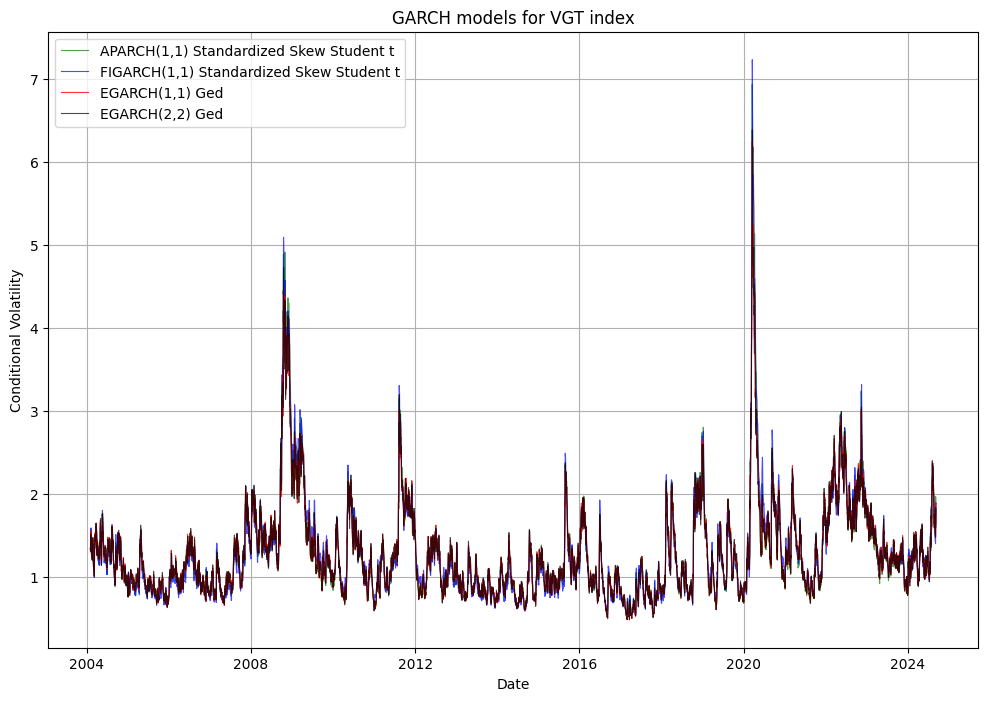

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(VGT_model_APARCH_result_1.conditional_volatility.index, VGT_model_APARCH_result_1.conditional_volatility, color='forestgreen',alpha=0.8,linewidth=0.8, label='APARCH(1,1) Standardized Skew Student t')
plt.plot(VGT_model_FIGARCH_result.conditional_volatility.index, VGT_model_FIGARCH_result.conditional_volatility, color='blue',alpha=0.7,linewidth=0.8, label='FIGARCH(1,1) Standardized Skew Student t')
plt.plot(VGT_model_VGT_model_EGARCH_1_result.conditional_volatility.index, VGT_model_VGT_model_EGARCH_1_result.conditional_volatility, color='red',alpha=0.8,linewidth=0.8, label='EGARCH(1,1) Ged')
plt.plot(VGT_model_VGT_model_EGARCH_2_result.conditional_volatility.index, VGT_model_VGT_model_EGARCH_2_result.conditional_volatility, color='black',alpha=0.7,linewidth=0.8, label='EGARCH(2,2) Ged')

plt.title('GARCH models for VGT index')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.grid(True)
plt.legend()
plt.show()

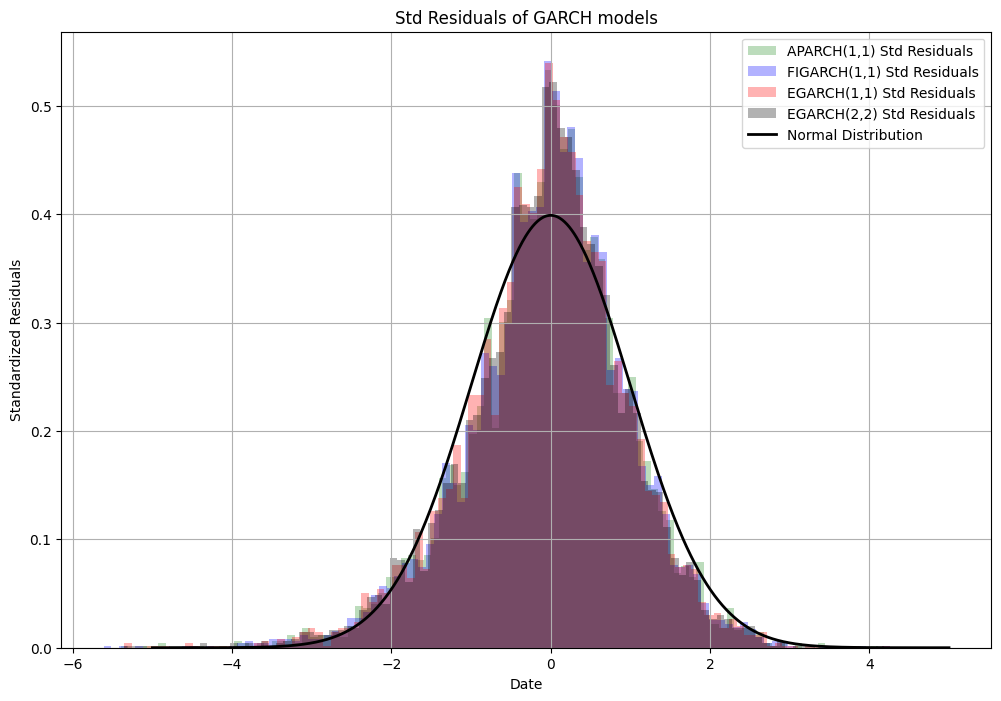

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist( VGT_model_APARCH_result_1.std_resid, color='forestgreen',alpha=0.3, label='APARCH(1,1) Std Residuals', bins=100, density=True,histtype='stepfilled')
plt.hist( VGT_model_FIGARCH_result.std_resid, color='blue',alpha=0.3, label='FIGARCH(1,1) Std Residuals', bins=100, density=True,histtype='stepfilled')
plt.hist( VGT_model_VGT_model_EGARCH_1_result.std_resid, color='red',alpha=0.3, label='EGARCH(1,1) Std Residuals', bins=100, density=True,histtype='stepfilled')
plt.hist( VGT_model_VGT_model_EGARCH_2_result.std_resid, color='black',alpha=0.3, label='EGARCH(2,2) Std Residuals', bins=100, density=True,histtype='stepfilled')

x = np.linspace(-5, 5, 1000)
normal_pdf = stats.norm.pdf(x)
plt.plot(x, normal_pdf, color='black', lw=2, label='Normal Distribution')


plt.title('Std Residuals of GARCH models')
#plt.xlim(-5,5)
plt.xlabel('Date')
plt.ylabel('Standardized Residuals')
plt.grid(True)
plt.legend()
plt.show()

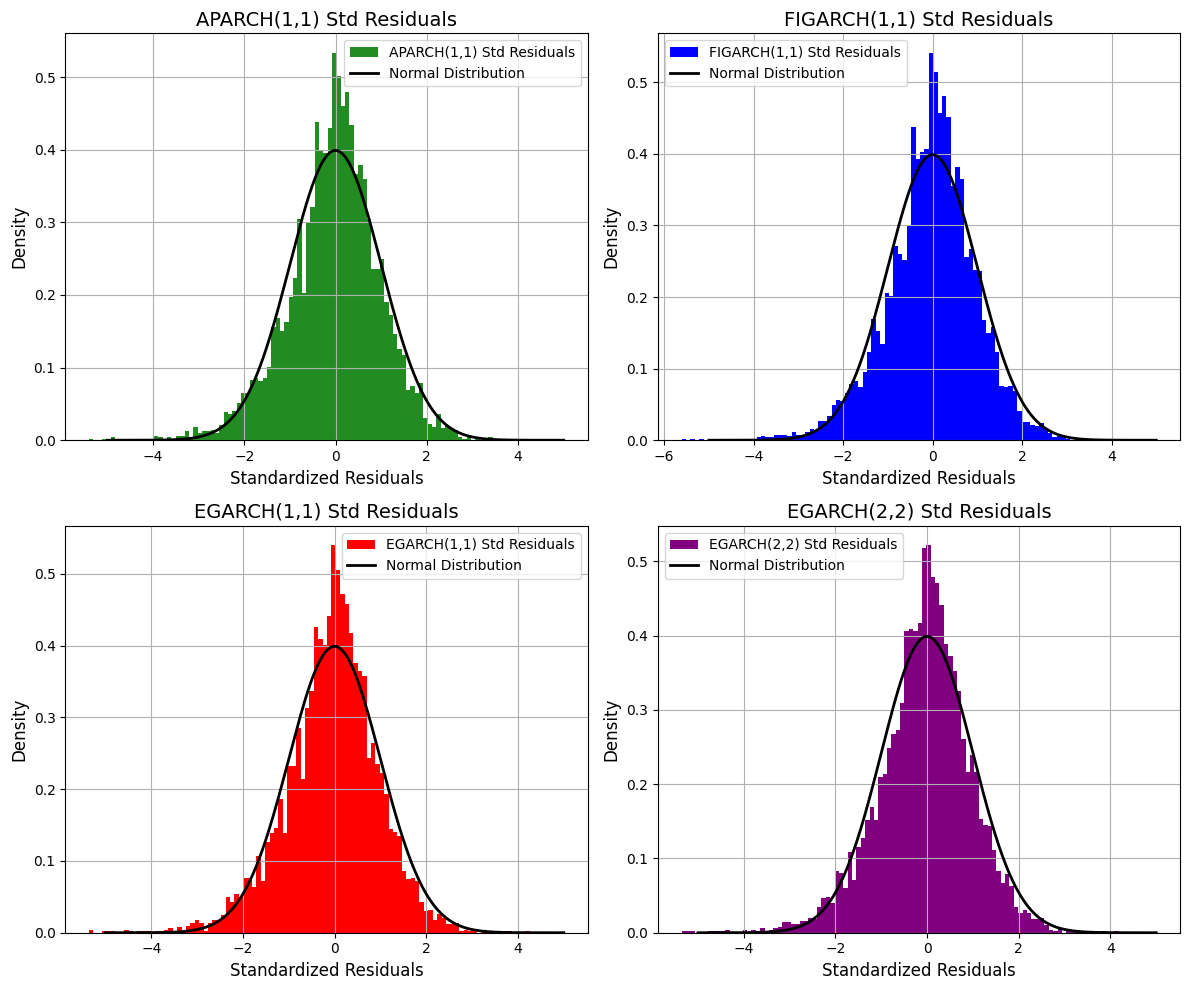

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the models and colors for easy looping
models = [
    (VGT_model_APARCH_result_1.std_resid, 'forestgreen', 'APARCH(1,1) Std Residuals'),
    (VGT_model_FIGARCH_result.std_resid, 'blue', 'FIGARCH(1,1) Std Residuals'),
    (VGT_model_VGT_model_EGARCH_1_result.std_resid, 'red', 'EGARCH(1,1) Std Residuals'),
    (VGT_model_VGT_model_EGARCH_2_result.std_resid, 'purple', 'EGARCH(2,2) Std Residuals')
]

# Loop through the models to create histograms
for i, (residuals, color, label) in enumerate(models):
    ax = axes[i // 2, i % 2]  # Determine the correct subplot
    ax.hist(residuals, color=color, alpha=1, label=label, bins=100, density=True, histtype='stepfilled')


    x = np.linspace(-5, 5, 1000)
    normal_pdf = stats.norm.pdf(x)
    ax.plot(x, normal_pdf, color='black', lw=2, label='Normal Distribution')


    ax.set_title(label, fontsize=14)
    ax.set_xlabel('Standardized Residuals', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
jb_test_APARCH = stats.jarque_bera(VGT_model_APARCH_result_1.std_resid)
jb_test_FIGARCH = stats.jarque_bera(VGT_model_FIGARCH_result.std_resid)
jb_test_EGARCH_1 = stats.jarque_bera(VGT_model_VGT_model_EGARCH_1_result.std_resid)
jb_test_EGARCH_2 = stats.jarque_bera(VGT_model_VGT_model_EGARCH_2_result.std_resid)

print("Jarque-Bera Test Results for VGT Models:")
for model_name, jb_test in zip(
    ["APARCH(1,1)", "FIGARCH(1,1)", "EGARCH(1,1)", "EGARCH(2,2)"],
    [jb_test_APARCH, jb_test_FIGARCH, jb_test_EGARCH_1, jb_test_EGARCH_2]
):
    jb_statistic, p_value = jb_test
    print(f"Model {model_name} - Jarque-Bera Statistic: {jb_statistic:.4f}, p-value: {p_value:.4f}")


p_values = {
    "APARCH(1,1)": jb_test_APARCH[1],
    "FIGARCH(1,1)": jb_test_FIGARCH[1],
    "EGARCH(1,1)": jb_test_EGARCH_1[1],
    "EGARCH(2,2)": jb_test_EGARCH_2[1],
}


best_model_jb = max(p_values, key=p_values.get)
print(f"\nBest Model based on Jarque-Bera Test: {best_model_jb} with p-value: {p_values[best_model_jb]:.4f}")

Jarque-Bera Test Results for VGT Models:
Model APARCH(1,1) - Jarque-Bera Statistic: 502.5212, p-value: 0.0000
Model FIGARCH(1,1) - Jarque-Bera Statistic: 526.4604, p-value: 0.0000
Model EGARCH(1,1) - Jarque-Bera Statistic: 554.5026, p-value: 0.0000
Model EGARCH(2,2) - Jarque-Bera Statistic: 525.3348, p-value: 0.0000

Best Model based on Jarque-Bera Test: APARCH(1,1) with p-value: 0.0000


no one is normal

In [ ]:
ljung_box_APARCH = acorr_ljungbox(VGT_model_APARCH_result_1.std_resid, lags=[10], return_df=True)
ljung_box_FIGARCH = acorr_ljungbox(VGT_model_FIGARCH_result.std_resid, lags=[10], return_df=True)
ljung_box_EGARCH_1 = acorr_ljungbox(VGT_model_VGT_model_EGARCH_1_result.std_resid, lags=[10], return_df=True)
ljung_box_EGARCH_2 = acorr_ljungbox(VGT_model_VGT_model_EGARCH_2_result.std_resid, lags=[10], return_df=True)


print("Ljung-Box Test Results for VGT Models:")
for model_name, ljung_box in zip(
    ["APARCH(1,1)", "FIGARCH(1,1)", "EGARCH(1,1)", "EGARCH(2,2)"],
    [ljung_box_APARCH, ljung_box_FIGARCH, ljung_box_EGARCH_1, ljung_box_EGARCH_2]
):
    lb_statistic = ljung_box['lb_stat'].values[0]
    p_value = ljung_box['lb_pvalue'].values[0]
    print(f"Model {model_name} - Ljung-Box Statistic: {lb_statistic:.4f}, p-value: {p_value:.4f}")


p_values = {
    "APARCH(1,1)": ljung_box_APARCH['lb_pvalue'].values[0],
    "FIGARCH(1,1)": ljung_box_FIGARCH['lb_pvalue'].values[0],
    "EGARCH(1,1)": ljung_box_EGARCH_1['lb_pvalue'].values[0],
    "EGARCH(2,2)": ljung_box_EGARCH_2['lb_pvalue'].values[0],
}

best_model_lb = max(p_values, key=p_values.get)
print(f"\nBest Model based on Ljung-Box Test: {best_model_lb} with p-value: {p_values[best_model_lb]:.4f}")

Ljung-Box Test Results for VGT Models:
Model APARCH(1,1) - Ljung-Box Statistic: 11.4591, p-value: 0.3229
Model FIGARCH(1,1) - Ljung-Box Statistic: 12.1627, p-value: 0.2743
Model EGARCH(1,1) - Ljung-Box Statistic: 12.3337, p-value: 0.2633
Model EGARCH(2,2) - Ljung-Box Statistic: 12.1398, p-value: 0.2758

Best Model based on Ljung-Box Test: APARCH(1,1) with p-value: 0.3229


p-value is greater than 0.05, indicating that the residuals have no significant autocorrelation

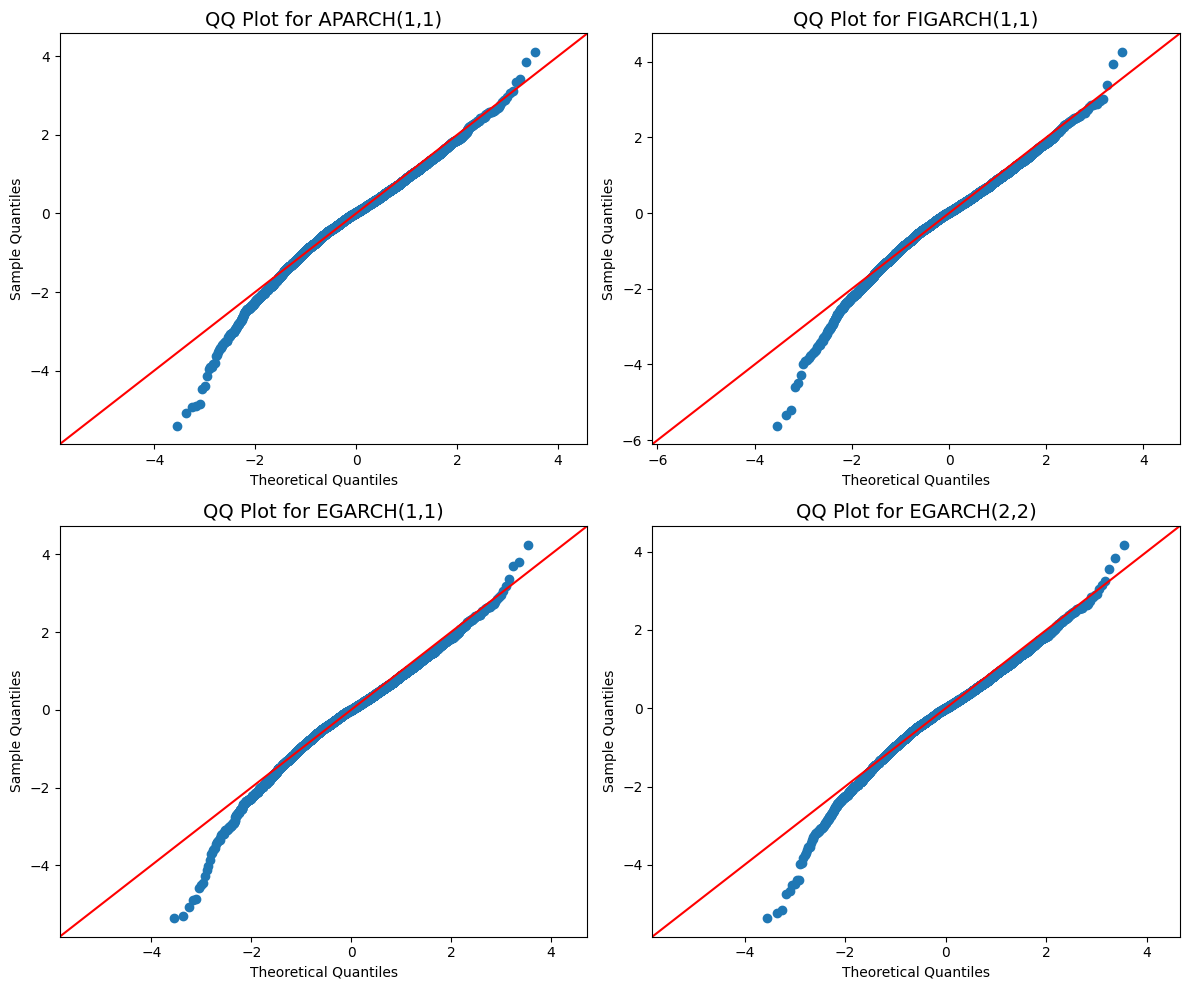

In [ ]:
residuals_APARCH = VGT_model_APARCH_result_1.std_resid
residuals_FIGARCH = VGT_model_FIGARCH_result.std_resid
residuals_EGARCH_1 = VGT_model_VGT_model_EGARCH_1_result.std_resid
residuals_EGARCH_2 = VGT_model_VGT_model_EGARCH_2_result.std_resid

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sm.qqplot(residuals_APARCH, line='45', ax=axes[0, 0])
axes[0, 0].set_title('QQ Plot for APARCH(1,1)', fontsize=14)

sm.qqplot(residuals_FIGARCH, line='45', ax=axes[0, 1])
axes[0, 1].set_title('QQ Plot for FIGARCH(1,1)', fontsize=14)

sm.qqplot(residuals_EGARCH_1, line='45', ax=axes[1, 0])
axes[1, 0].set_title('QQ Plot for EGARCH(1,1)', fontsize=14)

sm.qqplot(residuals_EGARCH_2, line='45', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot for EGARCH(2,2)', fontsize=14)

plt.tight_layout()
plt.show()

fit the FIGARCH (and the APARCH )  on the residuals of the ARMA

                         Constant Mean - Power ARCH Model Results                        
Dep. Variable:                              None   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            Power ARCH   Log-Likelihood:               -8125.51
Distribution:      Standardized Skew Student's t   AIC:                           16265.0
Method:                       Maximum Likelihood   BIC:                           16310.9
                                                   No. Observations:                 5184
Date:                           Sat, Oct 12 2024   Df Residuals:                     5183
Time:                                   10:02:06   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

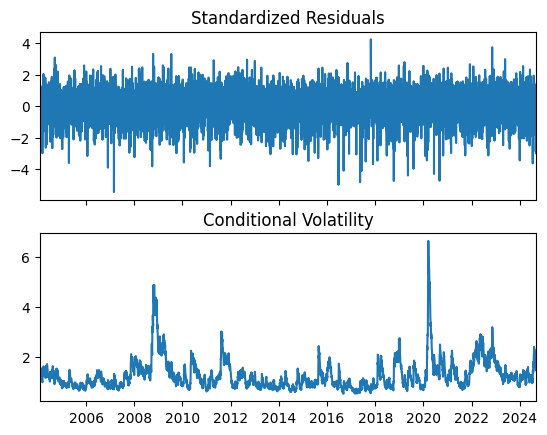

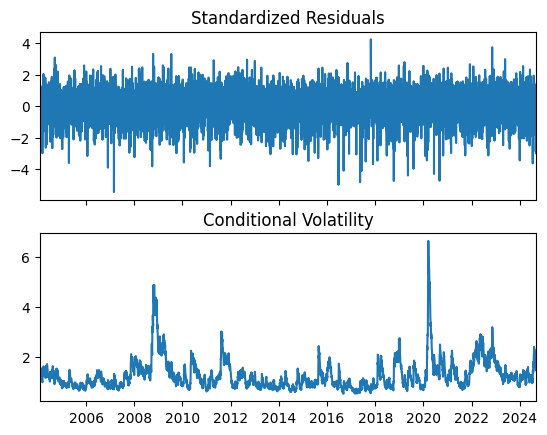

In [ ]:
VGT_model_on_ARMA_res_APARCH = arch_model(arma_VGT_result.resid, vol='APARCH', p=1, q=1, dist='skewt')
VGT_model_result_on_ARMA_res_APARCH = VGT_model_on_ARMA_res_APARCH.fit(disp='off')
print(VGT_model_result_on_ARMA_res_APARCH.summary())
VGT_model_result_on_ARMA_res_APARCH.plot()

                          Constant Mean - FIGARCH Model Results                          
Dep. Variable:                              None   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                               FIGARCH   Log-Likelihood:               -8119.04
Distribution:      Standardized Skew Student's t   AIC:                           16252.1
Method:                       Maximum Likelihood   BIC:                           16298.0
                                                   No. Observations:                 5184
Date:                           Sat, Oct 12 2024   Df Residuals:                     5183
Time:                                   10:02:49   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

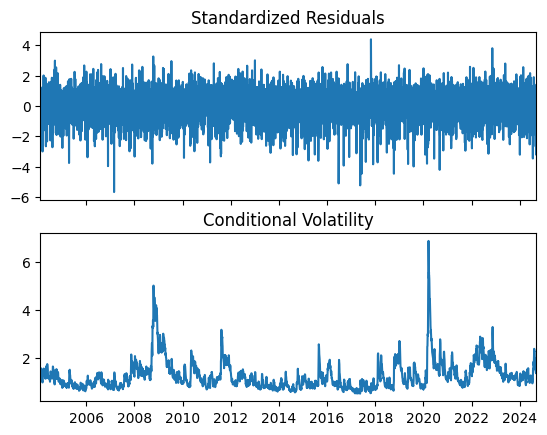

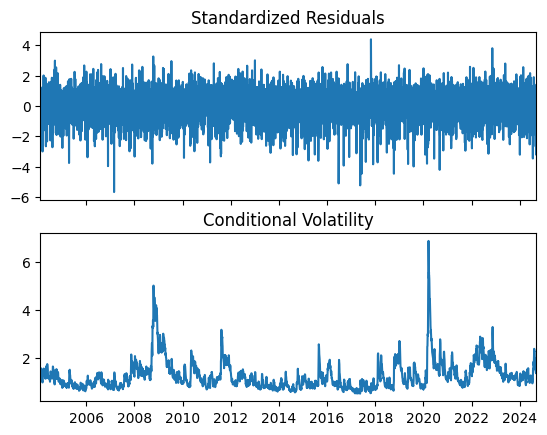

In [ ]:
VGT_model_on_ARMA_res_FIGARCH = arch_model(arma_VGT_result.resid, vol='FIGARCH', p=1, q=1, dist='skewt')
VGT_model_result_on_ARMA_res_FIGARCH = VGT_model_on_ARMA_res_FIGARCH.fit(disp='off')
print(VGT_model_result_on_ARMA_res_FIGARCH.summary())
VGT_model_result_on_ARMA_res_FIGARCH.plot()

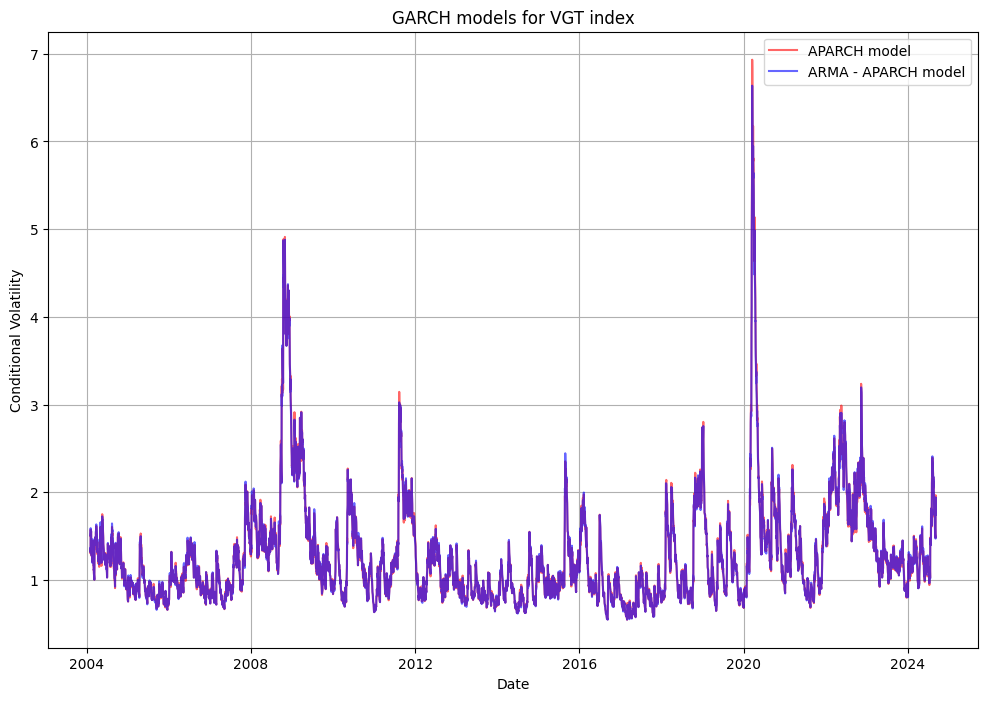

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(VGT_model_APARCH_result_1.conditional_volatility.index, VGT_model_APARCH_result_1.conditional_volatility, color='red',alpha=0.6, label='APARCH model')
plt.plot(VGT_model_result_on_ARMA_res_APARCH.conditional_volatility.index, VGT_model_result_on_ARMA_res_APARCH.conditional_volatility, color='blue',alpha=0.6, label='ARMA - APARCH model')

plt.title('GARCH models for VGT index')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.grid(True)
plt.legend()
plt.show()

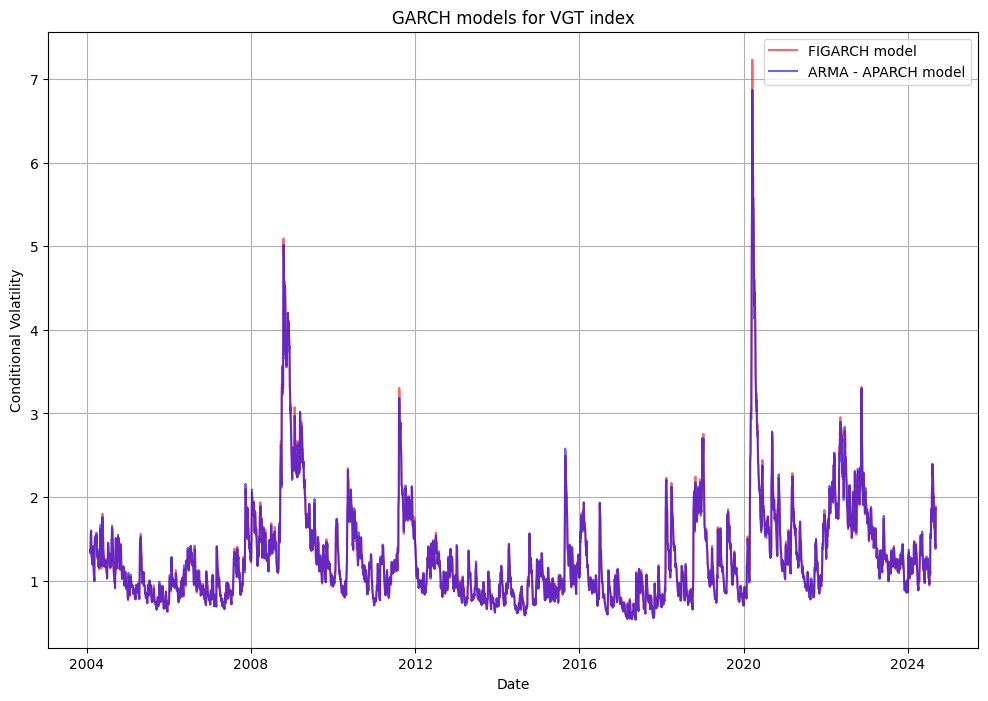

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(VGT_model_FIGARCH_result.conditional_volatility.index, VGT_model_FIGARCH_result.conditional_volatility, color='red',alpha=0.6, label='FIGARCH model')
plt.plot(VGT_model_result_on_ARMA_res_FIGARCH.conditional_volatility.index, VGT_model_result_on_ARMA_res_FIGARCH.conditional_volatility, color='blue',alpha=0.6, label='ARMA - FIGARCH model')

plt.title('GARCH models for VGT index')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
aic_arma_aparch = VGT_model_result_on_ARMA_res_APARCH.aic
aic_aparch = VGT_model_APARCH_result_1.aic

print(f'AIC (ARMA-APARCH): {aic_arma_aparch}')
print(f'AIC (GARCH): {aic_aparch}')

AIC (ARMA-APARCH): 16265.023605027713
AIC (GARCH): 16262.016995749587


In [ ]:
aic_arma_figarch = VGT_model_result_on_ARMA_res_FIGARCH.aic
aic_figarch = VGT_model_FIGARCH_result.aic

print(f'AIC (ARMA-APARCH): {aic_arma_figarch}')
print(f'AIC (GARCH): {aic_figarch}')

AIC (ARMA-APARCH): 16252.088475525372
AIC (GARCH): 16249.454183280071


In [ ]:
# ARMA-APARCH resid
ljungbox_arma_aparch_ = acorr_ljungbox(VGT_model_result_on_ARMA_res_APARCH.std_resid, lags=[10], return_df=True)
print("Ljung-Box Test (ARMA-APARCH):")
print(ljungbox_arma_aparch_)

# APARCH resid
ljungbox_aparch_ = acorr_ljungbox(VGT_model_APARCH_result_1.std_resid, lags=[10], return_df=True)
print("Ljung-Box Test (APARCH):")
print(ljungbox_aparch_)

Ljung-Box Test (ARMA-APARCH):
      lb_stat  lb_pvalue
10  29.672629   0.000969
Ljung-Box Test (APARCH):
      lb_stat  lb_pvalue
10  11.459125   0.322883


In [ ]:
# ARMA-FIGARCH resid
ljungbox_arma_figarch_ = acorr_ljungbox(VGT_model_result_on_ARMA_res_FIGARCH.std_resid, lags=[10], return_df=True)
print("Ljung-Box Test (ARMA-FIGARCH):")
print(ljungbox_arma_figarch_)

# FIGARCH resid
ljungbox_figarch_ = acorr_ljungbox(VGT_model_FIGARCH_result.std_resid, lags=[10], return_df=True)
print("Ljung-Box Test (FIGARCH):")
print(ljungbox_figarch_)

Ljung-Box Test (ARMA-FIGARCH):
      lb_stat  lb_pvalue
10  33.302323   0.000242
Ljung-Box Test (FIGARCH):
      lb_stat  lb_pvalue
10  12.162653   0.274318


In [ ]:
jb_test_APARCH_ARMA = stats.jarque_bera(VGT_model_result_on_ARMA_res_APARCH.std_resid)
jb_test_FIGARCH_ARMA = stats.jarque_bera(VGT_model_result_on_ARMA_res_FIGARCH.std_resid)

print(f'JB Test (ARMA-APARCH): {jb_test_APARCH_ARMA}')
print(f'JB Test (ARMA-FIGARCH): {jb_test_FIGARCH_ARMA}')

JB Test (ARMA-APARCH): SignificanceResult(statistic=515.3642499558654, pvalue=1.2304813538228537e-112)
JB Test (ARMA-FIGARCH): SignificanceResult(statistic=548.8689754471807, pvalue=6.525538220420294e-120)


non normali

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
arma_aparch_forecasts = []
aparch_forecasts = []

for t in range(len(returns_VGT_rescaled) - 1):
    # ARMA-GARCH model one-step-ahead forecast
    arma_aparch_forecast = VGT_model_result_on_ARMA_res_APARCH.forecast(horizon=1, start=t, reindex=False).mean['h.1'].iloc[0]
    arma_aparch_forecasts.append(arma_aparch_forecast)

    # GARCH-only model one-step-ahead forecast
    aparch_forecast = VGT_model_APARCH_result_1.forecast(horizon=1, start=t, reindex=False).mean['h.1'].iloc[0]
    aparch_forecasts.append(aparch_forecast)

# Convert forecast lists to NumPy arrays
arma_aparch_forecasts = np.array(arma_aparch_forecasts)
aparch_forecasts = np.array(aparch_forecasts)

# Extract actual returns (shift by 1 for comparison)
actual_values = returns_VGT_rescaled[1:].values  # Skipping the first value


In [ ]:
# RMSE for ARMA-GARCH
rmse_arma_aparch = np.sqrt(mean_squared_error(actual_values, arma_aparch_forecasts))

# RMSE for GARCH-only
rmse_aparch = np.sqrt(mean_squared_error(actual_values, aparch_forecasts))

# MAE for ARMA-GARCH
mae_arma_aparch = mean_absolute_error(actual_values, arma_aparch_forecasts)

# MAE for GARCH-only
mae_aparch = mean_absolute_error(actual_values, aparch_forecasts)

# Print results
print(f'RMSE (ARMA-APARCH): {rmse_arma_aparch}')
print(f'RMSE (APARCH): {rmse_aparch}')

print(f'MAE (ARMA-APARCH): {mae_arma_aparch}')
print(f'MAE (APARCH): {mae_aparch}')

RMSE (ARMA-APARCH): 1.4097890889054712
RMSE (APARCH): 1.4100563849278194
MAE (ARMA-APARCH): 0.9759600820760229
MAE (APARCH): 0.9731959190346264


In [ ]:
arma_figarch_forecasts = []
figarch_forecasts = []

for t in range(len(returns_VGT_rescaled) - 1):
    # ARMA-GARCH model one-step-ahead forecast
    arma_figarch_forecast = VGT_model_result_on_ARMA_res_FIGARCH.forecast(horizon=1, start=t, reindex=False).mean['h.1'].iloc[0]
    arma_figarch_forecasts.append(arma_figarch_forecast)

    # GARCH-only model one-step-ahead forecast
    figarch_forecast = VGT_model_FIGARCH_result.forecast(horizon=1, start=t, reindex=False).mean['h.1'].iloc[0]
    figarch_forecasts.append(figarch_forecast)

# Convert forecast lists to NumPy arrays
arma_figarch_forecasts = np.array(arma_figarch_forecasts)
figarch_forecasts = np.array(figarch_forecasts)

# Extract actual returns (shift by 1 for comparison)
actual_values = returns_VGT_rescaled[1:].values  # Skipping the first value

In [ ]:
# RMSE for ARMA-GARCH
rmse_arma_figarch = np.sqrt(mean_squared_error(actual_values, arma_figarch_forecasts))

# RMSE for GARCH-only
rmse_figarch = np.sqrt(mean_squared_error(actual_values, figarch_forecasts))

# MAE for ARMA-GARCH
mae_arma_figarch = mean_absolute_error(actual_values, arma_figarch_forecasts)

# MAE for GARCH-only
mae_figarch = mean_absolute_error(actual_values, figarch_forecasts)

# Print results
print(f'RMSE (ARMA-FIGARCH): {rmse_arma_figarch}')
print(f'RMSE (FIGARCH): {rmse_figarch}')

print(f'MAE (ARMA-FIGARCH): {mae_arma_figarch}')
print(f'MAE (FIGARCH): {mae_figarch}')

RMSE (ARMA-FIGARCH): 1.4098375149271491
RMSE (FIGARCH): 1.4099928847552914
MAE (ARMA-FIGARCH): 0.9761891548245649
MAE (FIGARCH): 0.9732588042186995


ARMA-GARCH performs slightly better in terms of RMSE.

GARCH-only performs slightly better in terms of MAE.

The differences are minimal, which suggests that adding the ARMA component to model the mean equation does not significantly improve forecast accuracy in this case.

In [ ]:
import seaborn as sns
from scipy.stats import norm

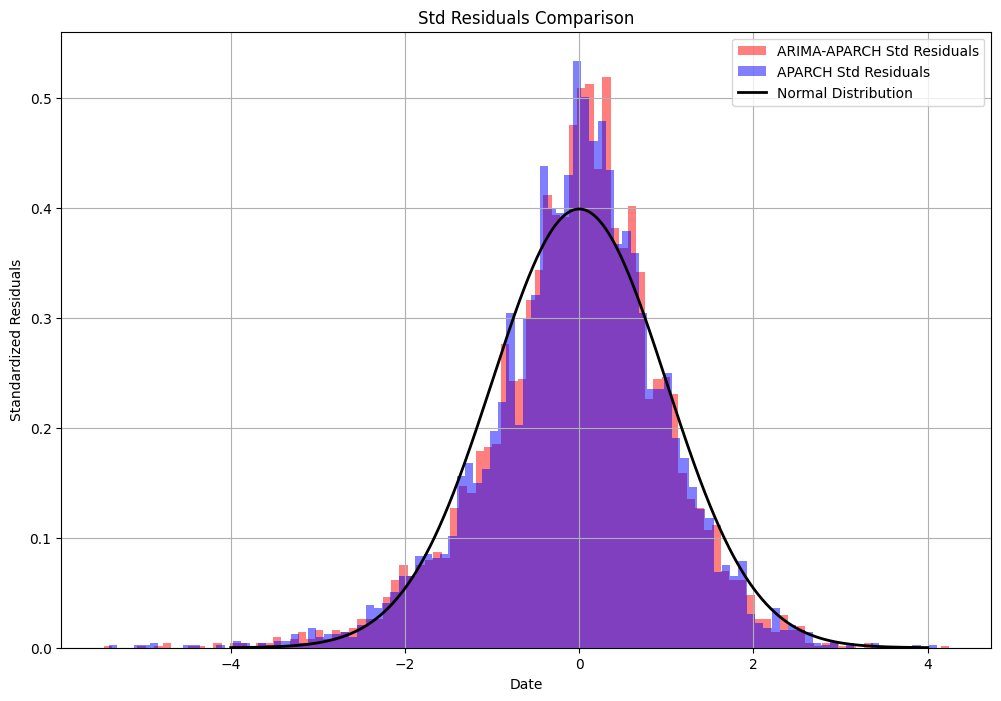

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist( VGT_model_result_on_ARMA_res_APARCH.std_resid, color='red',alpha=0.5, label='ARIMA-APARCH Std Residuals', bins=100, density=True)
plt.hist( VGT_model_APARCH_result_1.std_resid, color='blue',alpha=0.5, label='APARCH Std Residuals', bins=100, density=True)

x = np.linspace(-4, 4, 1000)
normal_pdf = stats.norm.pdf(x)
plt.plot(x, normal_pdf, color='black', lw=2, label='Normal Distribution')


plt.title('Std Residuals Comparison')
#plt.xlim(-5,5)
plt.xlabel('Date')
plt.ylabel('Standardized Residuals')
plt.grid(True)
plt.legend()
plt.show()

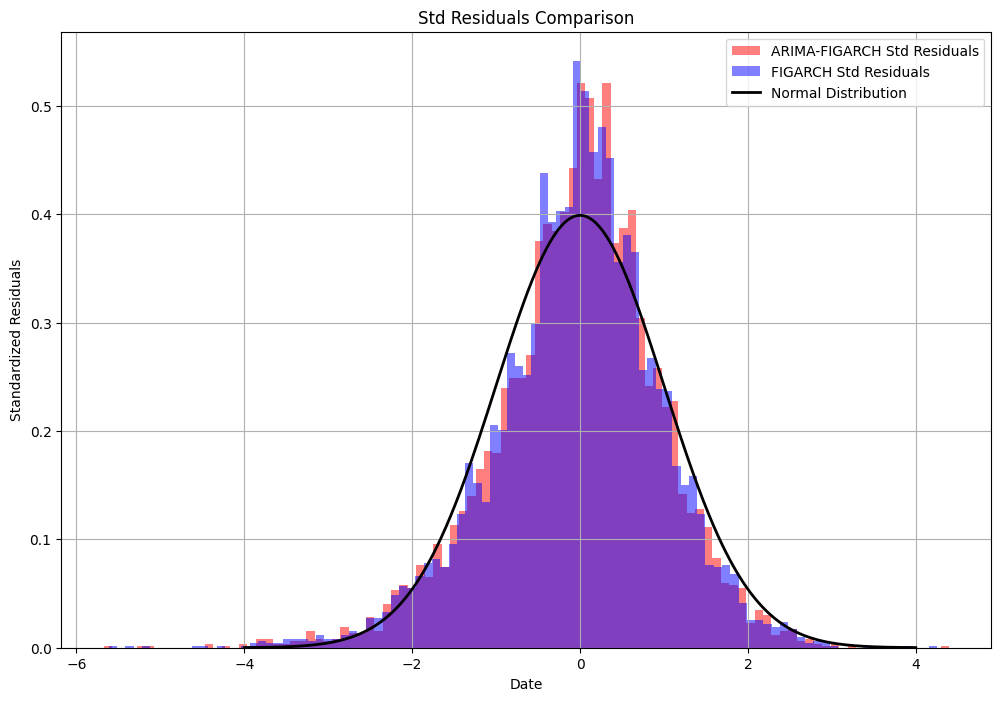

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist( VGT_model_result_on_ARMA_res_FIGARCH.std_resid, color='red',alpha=0.5, label='ARIMA-FIGARCH Std Residuals', bins=100, density=True)
plt.hist( VGT_model_FIGARCH_result.std_resid, color='blue',alpha=0.5, label='FIGARCH Std Residuals', bins=100, density=True)

x = np.linspace(-4, 4, 1000)
normal_pdf = stats.norm.pdf(x)
plt.plot(x, normal_pdf, color='black', lw=2, label='Normal Distribution')


plt.title('Std Residuals Comparison')
#plt.xlim(-5,5)
plt.xlabel('Date')
plt.ylabel('Standardized Residuals')
plt.grid(True)
plt.legend()
plt.show()

La scelta finale ricarde su APARCH(1,1) senza ARMA

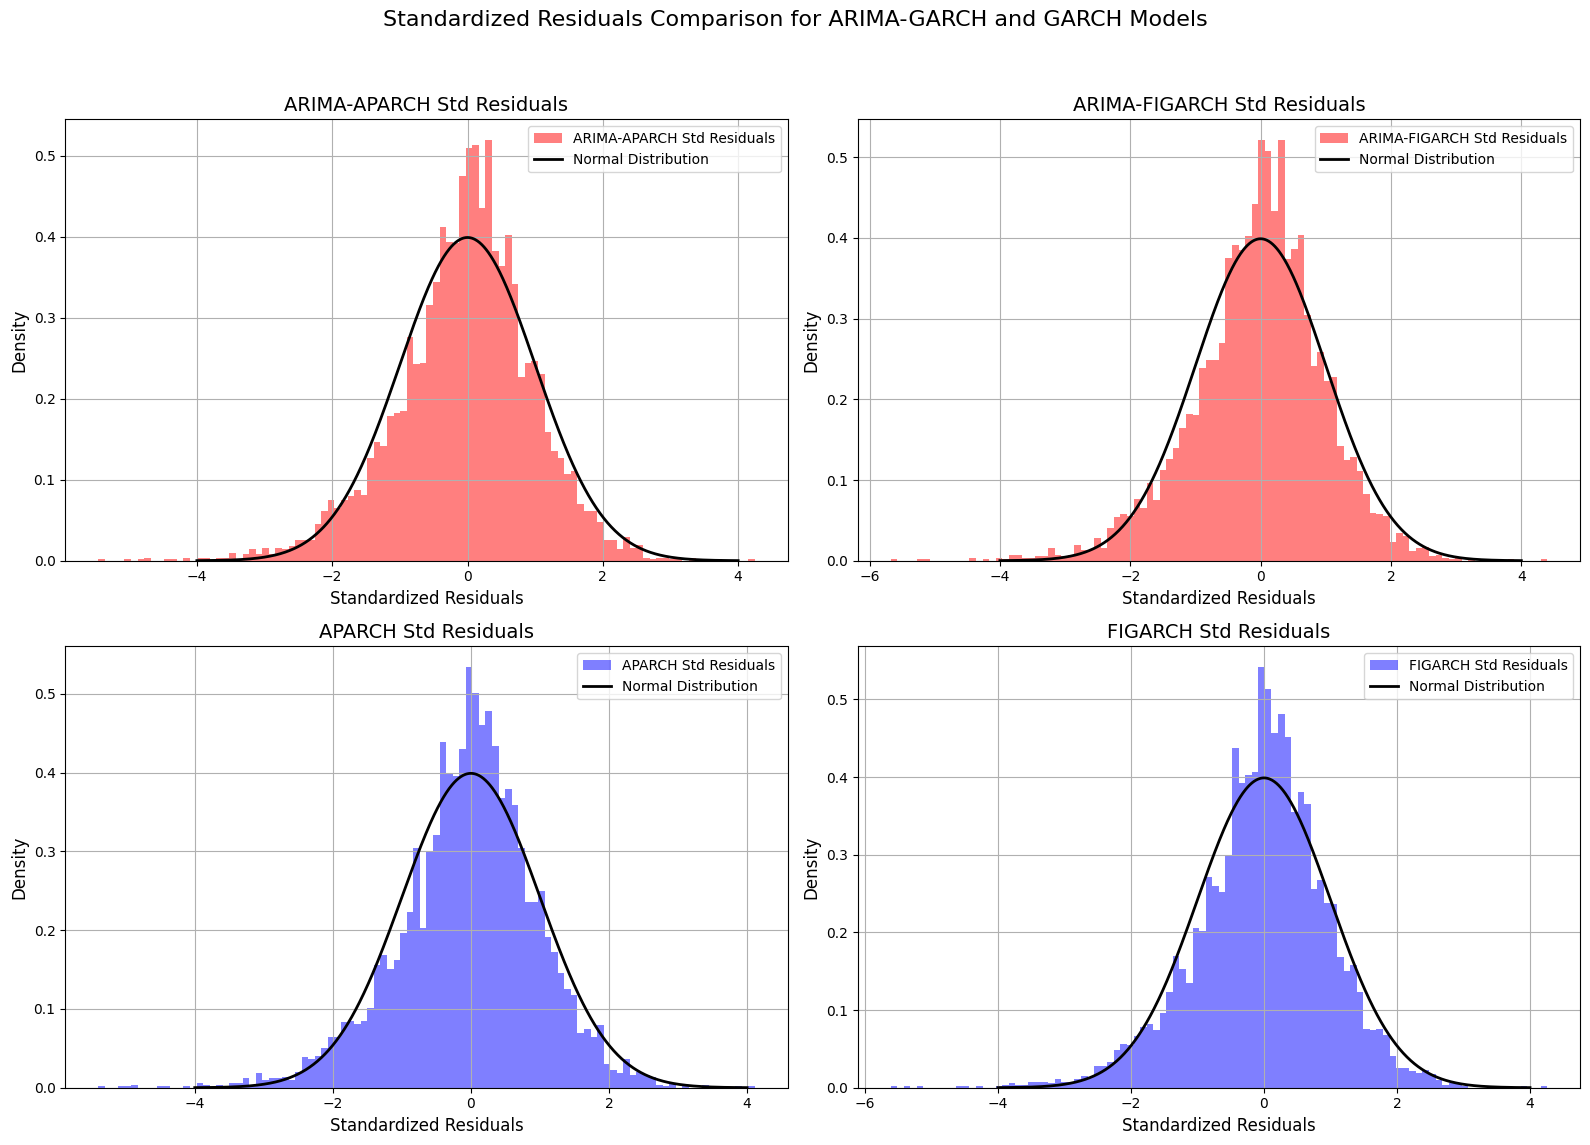

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].hist(VGT_model_result_on_ARMA_res_APARCH.std_resid, color='red', alpha=0.5, label='ARIMA-APARCH Std Residuals', bins=100, density=True)
axs[0, 0].plot(x, normal_pdf, color='black', lw=2, label='Normal Distribution')
axs[0, 0].set_title('ARIMA-APARCH Std Residuals', fontsize=14)
axs[0, 0].set_xlabel('Standardized Residuals', fontsize=12)
axs[0, 0].set_ylabel('Density', fontsize=12)
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].hist(VGT_model_result_on_ARMA_res_FIGARCH.std_resid, color='red', alpha=0.5, label='ARIMA-FIGARCH Std Residuals', bins=100, density=True)
axs[0, 1].plot(x, normal_pdf, color='black', lw=2, label='Normal Distribution')
axs[0, 1].set_title('ARIMA-FIGARCH Std Residuals', fontsize=14)
axs[0, 1].set_xlabel('Standardized Residuals', fontsize=12)
axs[0, 1].set_ylabel('Density', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].hist(VGT_model_APARCH_result_1.std_resid, color='blue', alpha=0.5, label='APARCH Std Residuals', bins=100, density=True)
axs[1, 0].plot(x, normal_pdf, color='black', lw=2, label='Normal Distribution')
axs[1, 0].set_title('APARCH Std Residuals', fontsize=14)
axs[1, 0].set_xlabel('Standardized Residuals', fontsize=12)
axs[1, 0].set_ylabel('Density', fontsize=12)
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].hist(VGT_model_FIGARCH_result.std_resid, color='blue', alpha=0.5, label='FIGARCH Std Residuals', bins=100, density=True)
axs[1, 1].plot(x, normal_pdf, color='black', lw=2, label='Normal Distribution')
axs[1, 1].set_title('FIGARCH Std Residuals', fontsize=14)
axs[1, 1].set_xlabel('Standardized Residuals', fontsize=12)
axs[1, 1].set_ylabel('Density', fontsize=12)
axs[1, 1].legend()
axs[1, 1].grid(True)

fig.suptitle('Standardized Residuals Comparison for ARIMA-GARCH and GARCH Models', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
